Import packages.

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2. Background

## 2.2. Implementation of the Delta rule

Architecture:
- 1 input layer with # nodes equal to dimension of patterns (X)
- 0 hidden layer
- 1 output layer with # nodes equal to dimension of targets or labels (Y)

Learning method:
- Delta rule in batch mode

In [2]:
def add_bias(patterns):
    N = patterns.shape[1]
    patterns = np.concatenate((patterns, np.ones(shape=(1,N))), axis=0)
    
    return(patterns)

def initialize_weights(n_output, n_input, seed=1):
    np.random.seed(seed)
    weights = np.random.normal(size=(n_output,n_input), loc=0, scale=1) 
    
    return(weights)

def delta_rule_batch_epochs(patterns, targets, weights, eta, epochs):
    weights = weights.copy()
    patterns = add_bias(patterns)
    for i in range(epochs):
        delta_weights = -eta*((weights@patterns)-targets)@patterns.T
        weights += delta_weights
    
    return(weights)

Apply to XOR problem, which cannot be solved with single perceptron (only one hyperplane or without hidden layers).

Delta rule in batch mode for 20 epochs and learning rate = 0.001:

 - The new weights [w1,w2,bias] are:
   [0.7179646041998846, -0.270397823774671, -0.23345320000679895]

 - The raw predictions with new weights are:
   [[-0.68101998  0.75490923 -1.22181563  0.21411358]]


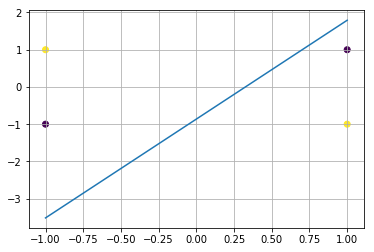

In [3]:
targets = np.array([[-1,1,1,-1]])
patterns = np.array([[-1,1,-1,1], [-1,-1,1,1]])

# Training with delta rule in batch mode
weights = initialize_weights(targets.shape[0], patterns.shape[0]+1)
new_weights = delta_rule_batch_epochs(patterns, targets, weights, eta=0.01, epochs=20)
w1, w2, bias = new_weights[0]
print('Delta rule in batch mode for 20 epochs and learning rate = 0.001:')
print('\n - The new weights [w1,w2,bias] are:\n  ', [w1,w2,bias])
print('\n - The raw predictions with new weights are:\n  ', new_weights@add_bias(patterns))

# Plot decision boundary
plt.scatter(patterns[0,:], patterns[1,:], c=targets[0,:])
x = np.linspace(-1, 1, 100)
plt.plot(x, -(w1*x+bias)/w2)
plt.grid(True)

## 2.3. Implementation of a two-layer perceptron

Architecture:
- 1 input layer with # nodes equal to dimension of patterns (X)
- 1 hidden layer with N nodes
- 1 output layer with # nodes equal to dimension of targets or labels (Y)

Learning method:
- Generalised delta rule or backpropagation in batch mode

In [4]:
def activation(summatory_input):
    return(2/(1+np.exp(-summatory_input))-1)

def gradient_activation(activated_output):
    return((1+activated_output)*(1-activated_output)/2)

def backpropagation(patterns, targets, weights1, weights2, n_hidden, epochs, momentum, eta):
    weights1 = weights1.copy()
    weights2 = weights2.copy()
    delta_weights1, delta_weights2 = 0, 0
    patterns = add_bias(patterns)
    for i in range(epochs):        
        
        # 2.3.1 Forward pass
        hidden_summatory_input = weights1@patterns
        hidden_activated_output = add_bias(activation(hidden_summatory_input))
        output_summatory_input = weights2@hidden_activated_output
        output_activated_output = activation(output_summatory_input)
        
        # 2.3.2 Backward pass
        delta_o = (output_activated_output-targets)*gradient_activation(output_activated_output)
        delta_h = (weights2.T@delta_o)*gradient_activation(hidden_activated_output)
        delta_h = delta_h[range(n_hidden),:]
        
        # 2.3.3 Weights update with momentum
        delta_weights1 = (delta_weights1*momentum)-(delta_h@patterns.T)*(1-momentum)
        delta_weights2 = (delta_weights2*momentum)-(delta_o@hidden_activated_output.T)*(1-momentum)
        weights1 = weights1+(delta_weights1*eta)
        weights2 = weights2+(delta_weights2*eta)
    
    return(weights1, weights2)

def forward(patterns, weights1, weights2):
    patterns = add_bias(patterns)
    hidden_summatory_input = weights1@patterns
    hidden_activated_output = add_bias(activation(hidden_summatory_input))
    output_summatory_input = weights2@hidden_activated_output
    output_activated_output = activation(output_summatory_input)            
    
    return(output_activated_output)

Apply to XOR problem with 1 hidden layer and 2 nodes.

Backpropagation in batch mode for 20 epochs with 2 hidden nodes and learning rate = 0.001:

 - The new weights connecting input layer and hidden node 1 [w11,w12,bias1] are:
   [1.4010934524104242, -0.900293323620811, -0.7969922734704702]

 - The new weights connecting input layer and hidden node 2 [w21,w22,bias2] are:
   [-0.9733574470294297, 0.7961585891077572, -2.3454745028126975]

 - The new weights connecting hidden and output layers are:
   [[ 1.49646453 -0.39200266 -0.55579709]]

 - The predictions with new weights are:
   [[-0.5000076   0.36965558 -0.71949064 -0.21749374]]


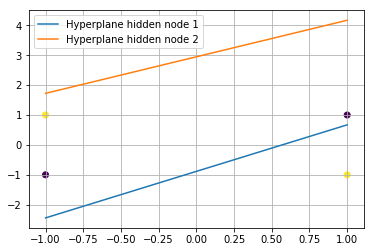

In [5]:
n_hidden = 2
targets = np.array([[-1,1,1,-1]])
patterns = np.array([[-1,1,-1,1], [-1,-1,1,1]])

# Training with generalised delta rule in batch mode
weights1 = initialize_weights(n_output=n_hidden, n_input=patterns.shape[0]+1, seed=1)
weights2 = initialize_weights(n_output=targets.shape[0], n_input=n_hidden+1)
new_weights1, new_weights2 = \
    backpropagation(patterns, targets, weights1, weights2, n_hidden, epochs=100, momentum=0.9, eta=0.01)
w11, w12, bias1 = new_weights1[0,0], new_weights1[0,1], new_weights1[0,2]
w21, w22, bias2 = new_weights1[1,0], new_weights1[1,1], new_weights1[1,2]
print('Backpropagation in batch mode for 20 epochs with 2 hidden nodes and learning rate = 0.001:')
print('\n - The new weights connecting input layer and hidden node 1 [w11,w12,bias1] are:\n  ',
      [w11, w12, bias1])
print('\n - The new weights connecting input layer and hidden node 2 [w21,w22,bias2] are:\n  ',
      [w21, w22, bias2])
print('\n - The new weights connecting hidden and output layers are:\n  ', new_weights2)
print('\n - The predictions with new weights are:\n  ', forward(patterns, new_weights1, new_weights2))

# Plot decision boundaries
plt.scatter(patterns[0,:], patterns[1,:], c=targets[0,:])
x = np.linspace(-1, 1, 100)
plt.plot(x, -(w11*x+bias1)/w12, label="Hyperplane hidden node 1")
plt.plot(x, -(w21*x+bias2)/w22, label="Hyperplane hidden node 2")
plt.legend()
plt.grid(True)

# 3. Assignment - Part 1

## 3.1. Classification with a single-layer perceptron

### 3.1.1. Generation of linearly-separable data

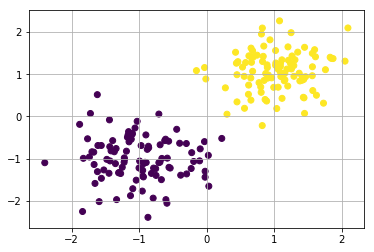

In [6]:
def generate_points(n_A, n_B, mu_A, mu_B, sigma_A, sigma_B, seed=1):
    class_A = np.array([np.random.randn(n_A)*sigma_A+mu_A[0], np.random.randn(n_A)*sigma_A+mu_A[1]])
    class_B = np.array([np.random.randn(n_B)*sigma_B+mu_B[0], np.random.randn(n_B)*sigma_B+mu_B[1]])
    patterns = np.concatenate((class_A, class_B), axis=1)
    targets = np.array([1]*n_A+[-1]*n_B)    
    
    # Shuffling
    np.random.seed(seed)
    idx = list(range(n_A+n_B))
    np.random.shuffle(idx)
    patterns = patterns[:,idx]
    targets = targets[idx]
    
    return(patterns, targets)

patterns,targets = generate_points(n_A=100, n_B=100, mu_A=[1,1], mu_B=[-1,-1], sigma_A=0.5, sigma_B=0.5)
plt.scatter(patterns[0,:], patterns[1,:], c=targets)
plt.grid(True)

### 3.1.2. Classifcation with a single-layer perceptron and analysis

Architecture:
- 1 input layer with # nodes equal to dimension of patterns (X)
- 0 hidden layer
- 1 output layer with # nodes equal to dimension of targets or labels (Y)

Learning method:
- Delta rule and perceptron learning in batch mode

Implementation of single-layer perceptron with perceptron learning in batch mode.

In [7]:
def perceptron_batch_epochs(patterns, targets, weights, eta, epochs):
    weights = weights.copy()
    patterns = add_bias(patterns)
    # Iterate epochs saving error and weight at each epoch
    error_by_epoch = [np.mean(abs(np.sign(weights@patterns)-targets)/2)]
    weights_by_epoch = [weights]
    for i in range(epochs):
        delta_weights = -eta*(np.sign(weights@patterns)-targets)@patterns.T/2
        weights = weights + delta_weights
        weights_by_epoch.append(weights)
        error_by_epoch.append(np.mean(abs(np.sign(weights@patterns)-targets)/2))
    
    return(weights, error_by_epoch, weights_by_epoch)

Implementation of of single-layer perceptron with delta rule in batch mode. Just add the error and weights by epochs to the previously created function.

In [8]:
def delta_rule_batch_epochs(patterns, targets, weights, eta, epochs):
    weights = weights.copy()
    patterns = add_bias(patterns)
    # Iterate epochs saving error and weight at each epoch
    error_by_epoch = [np.mean(abs(np.sign(weights@patterns)-targets)/2)]
    weights_by_epoch = [weights]
    for i in range(epochs):
        delta_weights = -eta*((weights@patterns)-targets)@patterns.T
        weights = weights + delta_weights
        weights_by_epoch.append(weights)
        error_by_epoch.append(np.mean(abs(np.sign(weights@patterns)-targets)/2))
    
    return(weights, error_by_epoch, weights_by_epoch)

Create a function to plot error and decision boundaries by epochs.

In [9]:
def error_by_epoch(error_by_epoch, title, color="black"):
    plt.plot(error_by_epoch, c=color, label="Eta "+str(eta))
    plt.xticks(np.arange(0, len(error_by_epoch)+1))
    plt.ylim((0, max(error_by_epoch)))
    plt.xlabel("Epoch")
    plt.ylabel("1-Accuracy = Error")
    plt.title("Error by epoch for "+title)
    plt.legend()

def decision_boundary_by_epoch(patterns, targets, weights_by_epoch, title):
    plt.scatter(patterns[0,:], patterns[1,:], c=targets)
    x = np.linspace(min(patterns[0,:]), max(patterns[0,:]), 100)
    epochs = len(weights_by_epoch)
    color = plt.cm.rainbow(np.linspace(0, 1, epochs))
    for i, c in zip(range(epochs), color):
        w1, w2, bias = weights_by_epoch[i][0]
        y = -(w1*x+bias)/w2
        if i%5==0:
            plt.plot(x, y, c=c, label="Epoch "+str(i))
    plt.legend()
    plt.ylim((min(patterns[1,:]), max(patterns[1,:])))
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Decision boundary by epoch for "+title)

#### Task 1. Apply and compare perceptron learning with the Delta learning rule in batch mode on the generated dataset. Adjust the learning rate and study the convergence of the two algorithms.

Comparing perceptron learning with delta rule in batch mode.

In [10]:
weights = initialize_weights(n_output=1, n_input=patterns.shape[0]+1, seed=1)
epochs = 25
eta = 0.001

# Training with perceptron learning in batch mode
weights_p, error_by_epoch_p, weights_by_epoch_p = \
    perceptron_batch_epochs(patterns, targets, weights, eta, epochs)

# Training with delta rule in batch mode
weights_dr, error_by_epoch_dr, weights_by_epoch_dr = \
    delta_rule_batch_epochs(patterns, targets, weights, eta, epochs)

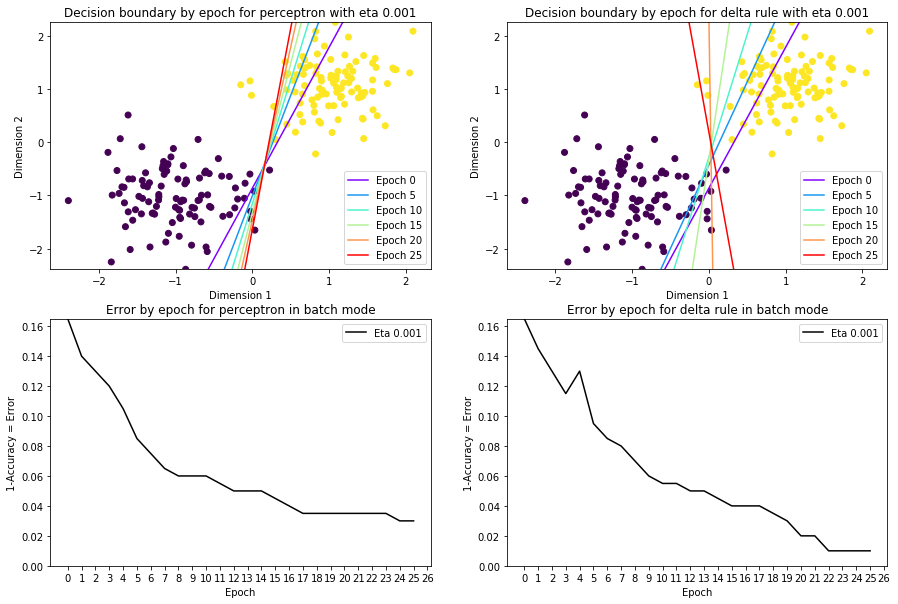

In [11]:
fig = plt.figure(figsize=(15,10))

fig.add_subplot(221)
decision_boundary_by_epoch(patterns, targets, weights_by_epoch_p, title="perceptron with eta "+str(eta))

fig.add_subplot(222)
decision_boundary_by_epoch(patterns, targets, weights_by_epoch_dr, title="delta rule with eta "+str(eta))

fig.add_subplot(223)
error_by_epoch(error_by_epoch_p, title="perceptron in batch mode")

fig.add_subplot(224)
error_by_epoch(error_by_epoch_dr, title="delta rule in batch mode")

Studying the effect of learning rate by learning method.

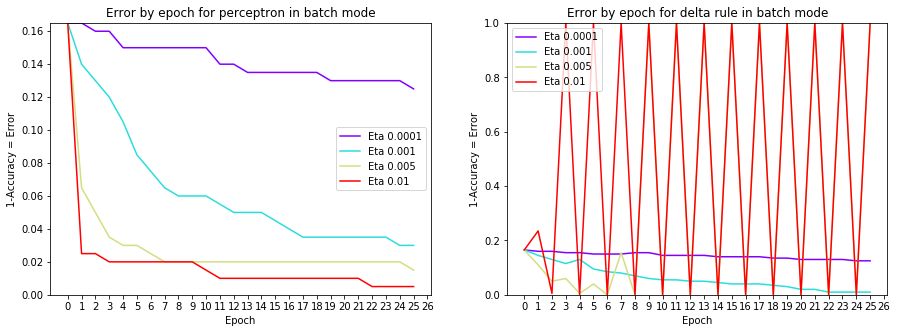

In [12]:
fig = plt.figure(figsize=(15,5))
etas = [0.0001,0.001,0.005,0.01]
color = plt.cm.rainbow(np.linspace(0, 1, len(etas)))
for eta, c in zip(etas, color):
    
    # Perceptron rule
    fig.add_subplot(121)
    weights_p, error_by_epoch_p, weights_by_epoch_p = \
        perceptron_batch_epochs(patterns, targets, weights, eta, epochs)
    error_by_epoch(error_by_epoch_p, title="perceptron in batch mode", color=c)
    
    # Delta rule
    fig.add_subplot(122)
    weights_dr, error_by_epoch_dr, weights_by_epoch_dr = \
        delta_rule_batch_epochs(patterns, targets, weights, eta, epochs)
    error_by_epoch(error_by_epoch_dr, title="delta rule in batch mode", color=c)

#### Task 2. Compare sequential with a batch learning approach for the Delta rule. How quickly (in terms of epochs) do the algorithms converge? Please adjust the learning rate and plot the learning curves for each variant. How sensitive is learning to random initialisation?

Implementation of of single-layer perceptron with delta rule in sequential mode.

In [13]:
def delta_rule_sequential_epochs(patterns, targets, weights, eta, epochs):
    weights = weights.copy()
    patterns = add_bias(patterns)
    # Iterate epochs saving error and weight at each epoch
    error_by_epoch = [np.mean(abs(np.sign(weights@patterns)-targets)/2)]
    weights_by_epoch = [weights]
    for i in range(epochs):
        for j in range(patterns.shape[1]):
            delta_weights = -eta*((weights@patterns[:,[j]])-targets[j])@patterns[:,[j]].T
            weights = weights + delta_weights
        weights_by_epoch.append(weights)
        error_by_epoch.append(np.mean(abs(np.sign(weights@patterns)-targets)/2))
    
    return(weights, error_by_epoch, weights_by_epoch)

Comparing sequential with batch learning for delta rule.

In [14]:
weights = initialize_weights(n_output=1, n_input=patterns.shape[0]+1, seed=1)
weightss = weights.copy()
epochs = 25
eta = 0.001

# Training with delta rule in batch mode
weights_dr, error_by_epoch_dr, weights_by_epoch_dr = \
    delta_rule_batch_epochs(patterns, targets, weights, eta, epochs)

# Training with delta rule in sequential mode
weights_dr_seq, error_by_epoch_dr_seq, weights_by_epoch_dr_seq = \
    delta_rule_sequential_epochs(patterns, targets, weights, eta, epochs)

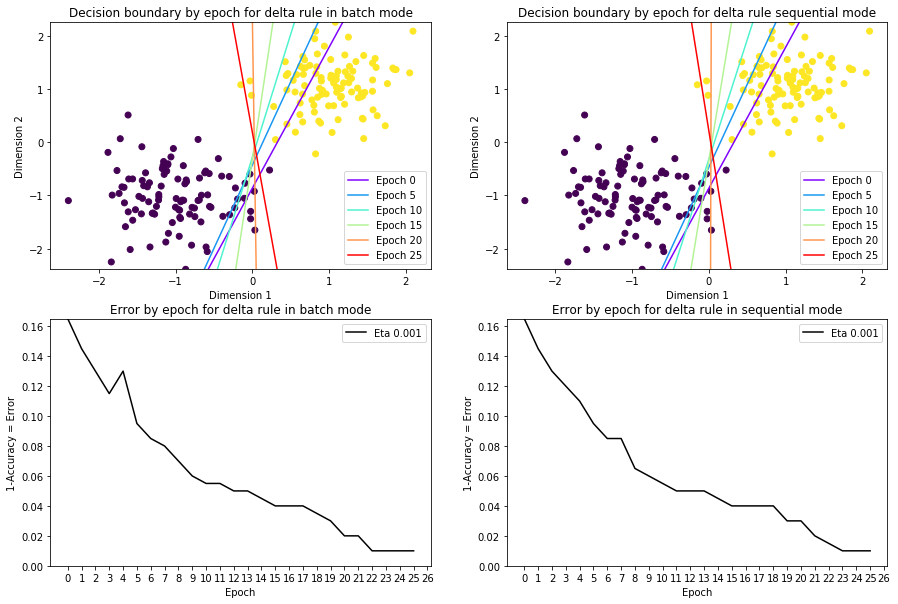

In [15]:
fig = plt.figure(figsize=(15,10))

fig.add_subplot(221)
decision_boundary_by_epoch(patterns, targets, weights_by_epoch_dr, title="delta rule in batch mode")

fig.add_subplot(222)
decision_boundary_by_epoch(patterns, targets, weights_by_epoch_dr_seq, title="delta rule sequential mode")

fig.add_subplot(223)
error_by_epoch(error_by_epoch_dr, title="delta rule in batch mode")

fig.add_subplot(224)
error_by_epoch(error_by_epoch_dr_seq, title="delta rule in sequential mode")

Studying the effect of learning rate by delta rule sequential/batch modes.

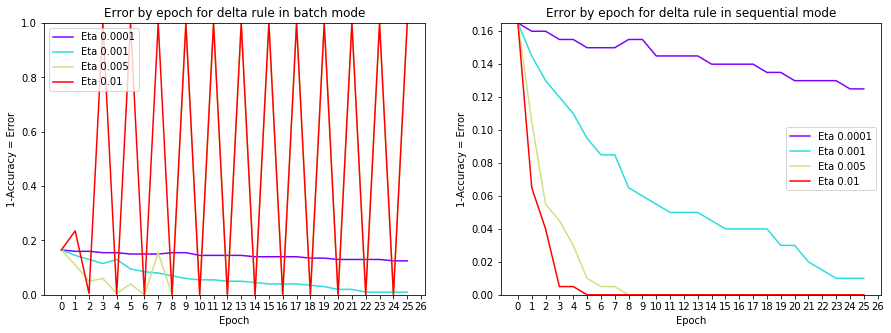

In [16]:
fig = plt.figure(figsize=(15,5))
etas = [0.0001,0.001,0.005,0.01]
color = plt.cm.rainbow(np.linspace(0, 1, len(etas)))
for eta, c in zip(etas, color):
    
    # Delta rule in batch mode
    fig.add_subplot(121)
    weights_dr, error_by_epoch_dr, weights_by_epoch_dr = \
        delta_rule_batch_epochs(patterns, targets, weights, eta, epochs)
    error_by_epoch(error_by_epoch_dr, title="delta rule in batch mode", color=c)
    
    # Delta rule in sequential mode
    fig.add_subplot(122)
    weights_dr_seq, error_by_epoch_dr_seq, weights_by_epoch_dr_seq = \
        delta_rule_sequential_epochs(patterns, targets, weights, eta, epochs)
    error_by_epoch(error_by_epoch_dr_seq, title="delta rule in sequential mode", color=c)

Studying the sensitivity to order of patterns.

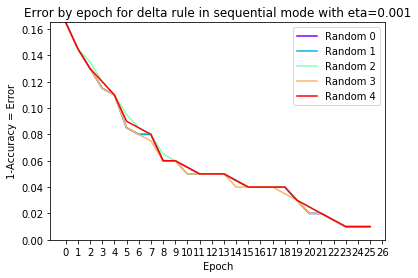

In [17]:
weights = initialize_weights(n_output=1, n_input=patterns.shape[0]+1, seed=1)
epochs = 25
eta = 0.001

# Iterate randomizations for suffling data
randomizations = 5
color = plt.cm.rainbow(np.linspace(0, 1, randomizations))
for i, c in zip(range(randomizations), color):
    
    # Shuffle
    np.random.seed(i)
    idx = np.array([i for i in range(patterns.shape[1])])
    np.random.shuffle(idx)
    suffled_patterns = patterns[:,idx]
    suffled_targets = targets[idx]

    # Training delta rule sequential with new patterns order and plot
    weights_dr_seq, error_by_epoch_dr_seq, weights_by_epoch_dr_seq = \
        delta_rule_sequential_epochs(suffled_patterns, suffled_targets, weights, eta, epochs)
    plt.plot(error_by_epoch_dr_seq, c=c, label="Random "+str(i))

plt.xticks(np.arange(0, len(error_by_epoch_dr_seq)+1))
plt.ylim((0, max(error_by_epoch_dr_seq)))
plt.xlabel("Epoch")
plt.ylabel("1-Accuracy = Error")
plt.title("Error by epoch for delta rule in sequential mode with eta="+str(eta))
plt.legend()

#### Task 3. Remove the bias, train your network with the Delta rule in batch mode and test its behaviour. In what cases would the perceptron without bias converge and classify correctly all data samples? Please verify your hypothesis by adjusting data parameters, muA and muB.

Generate new data with origin not between classes.

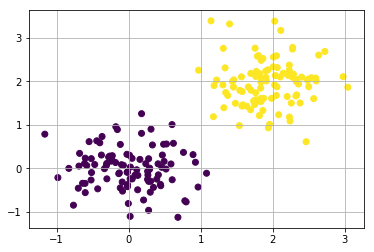

In [18]:
patterns, targets = generate_points(n_A=100, n_B=100, mu_A=[2,2], mu_B=[0,0], sigma_A=0.5, sigma_B=0.5)
plt.scatter(patterns[0,:], patterns[1,:], c=targets)
plt.grid(True)

Implementation of of single-layer perceptron with delta rule in batch mode WITHOUT bias.

In [19]:
def delta_rule_batch_epochs_no_bias(patterns, targets, weights, eta, epochs):
    weights = weights.copy()
    # patterns = add_bias(patterns)
    # Iterate epochs saving error and weight at each epoch
    error_by_epoch = [np.mean(abs(np.sign(weights@patterns)-targets)/2)]
    weights_by_epoch = [weights]
    for i in range(epochs):
        delta_weights = -eta*((weights@patterns)-targets)@patterns.T
        weights = weights + delta_weights
        weights_by_epoch.append(weights)
        error_by_epoch.append(np.mean(abs(np.sign(weights@patterns)-targets)/2))
    
    return(weights, error_by_epoch, weights_by_epoch)

Studying the effect of bias.

In [20]:
epochs = 100
eta = 0.001

# Training delta rule in batch mode with bias
weights = initialize_weights(n_output=1, n_input=patterns.shape[0]+1, seed=1)
weights_dr, error_by_epoch_dr, weights_by_epoch_dr = \
    delta_rule_batch_epochs(patterns, targets, weights, eta, epochs)

# Training delta rule in batch mode without bias
weights_no_bias = initialize_weights(n_output=1, n_input=patterns.shape[0], seed=1)
weights_dr_no_bias, error_by_epoch_dr_no_bias, weights_by_epoch_dr_no_bias = \
    delta_rule_batch_epochs_no_bias(patterns, targets, weights_no_bias, eta, epochs)

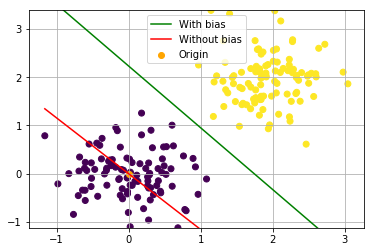

In [21]:
plt.scatter(patterns[0,:], patterns[1,:], c=targets)
plt.scatter(0, 0, c="orange", label="Origin")
plt.ylim((min(patterns[1,:]), max(patterns[1,:])))
x = np.linspace(min(patterns[0,:]), max(patterns[0,:]), 100)

# Decision boundary with bias
w1, w2, w0 = weights_dr[0]
y = -(w1*x+w0)/w2
plt.plot(x, y, c="green", label="With bias")

# Decision boundary without bias
w1_nobias, w2_nobias = weights_dr_no_bias[0]
y_nobias = -(w1_nobias*x)/w2_nobias
plt.plot(x, y_nobias, c="red", label="Without bias")

plt.legend()
plt.grid(True)

### 3.1.3. Classifcation of samples that are not linearly separable

#### 1. In this exercise, you should study how perceptron deals with data samples that are not linearly separable. Apply and compare perceptron learning and the Delta rules using either batch or sequential learning mode, similarly as in the previous exercise.

Generate new data no linearly separable.

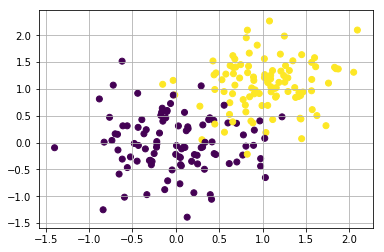

In [22]:
patterns, targets = generate_points(n_A=100, n_B=100, mu_A=[1,1], mu_B=[0,0], sigma_A=0.5, sigma_B=0.5)
plt.scatter(patterns[0,:], patterns[1,:], c=targets)
plt.grid(True)

Comparing how perceptron deals with data samples that are not linearly separable.

In [23]:
weights = initialize_weights(n_output=1, n_input=patterns.shape[0]+1, seed=1)
epochs = 25
eta = 0.001

# Training with perceptron learning in batch mode
weights_p, error_by_epoch_p, weights_by_epoch_p = \
    perceptron_batch_epochs(patterns, targets, weights, eta, epochs)

# Training with delta rule in batch mode
weights_dr, error_by_epoch_dr, weights_by_epoch_dr = \
    delta_rule_batch_epochs(patterns, targets, weights, eta, epochs)

# Training with delta rule in sequential mode
weights_dr_seq, error_by_epoch_dr_seq, weights_by_epoch_dr_seq = \
    delta_rule_sequential_epochs(patterns, targets, weights, eta, epochs)

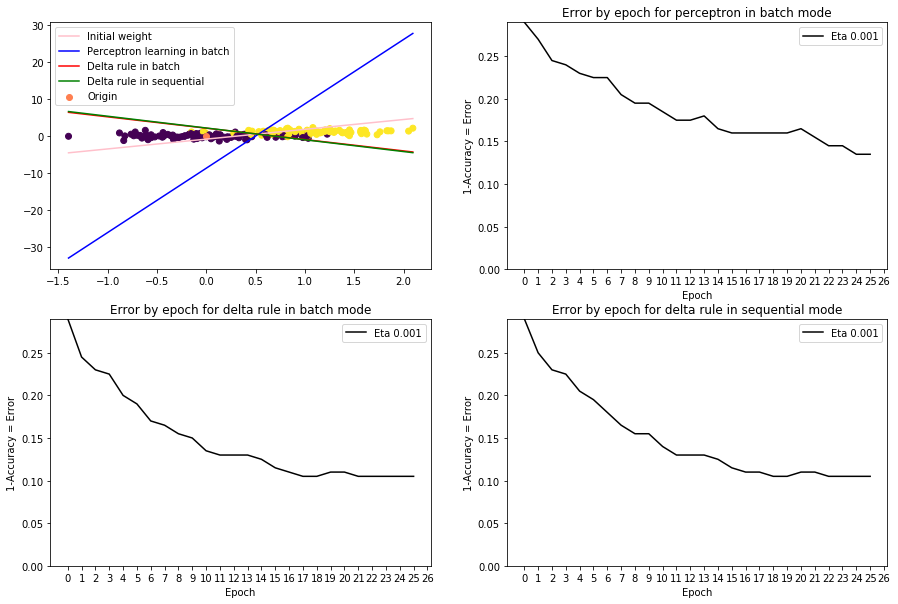

In [24]:
fig = plt.figure(figsize=(15,10))
fig.add_subplot(221)

plt.scatter(patterns[0,:], patterns[1,:], c=targets)
plt.scatter(0, 0, c="coral", label="Origin")
x = np.linspace(min(patterns[0,:]), max(patterns[0,:]), 100)

# Decision boundary with initial weights
w1, w2, bias = weights[0]
y = -(w1*x+bias)/w2
plt.plot(x, y, c="pink", label="Initial weight")

# Decision boundary with perceptron learning in batch mode
w1, w2, bias = weights_p[0]
y_p = -(w1*x+bias)/w2
plt.plot(x, y_p, c="blue", label="Perceptron learning in batch")

# Decision boundary with delta rule in batch mode
w1, w2, bias = weights_dr[0]
y_dr = -(w1*x+bias)/w2
plt.plot(x, y_dr, c="red", label="Delta rule in batch")

# Decision boundary with delta rule in sequential mode
w1, w2, bias = weights_dr_seq[0]
y_dr_seq = -(w1*x+bias)/w2
plt.plot(x, y_dr_seq, c="green", label="Delta rule in sequential")
plt.legend()

# Errors by epoch
fig.add_subplot(222)
error_by_epoch(error_by_epoch_p, title="perceptron in batch mode")

fig.add_subplot(223)
error_by_epoch(error_by_epoch_dr, title="delta rule in batch mode")

fig.add_subplot(224)
error_by_epoch(error_by_epoch_dr_seq, title="delta rule in sequential mode")

#### 2. Generate a different version of linearly non-separable dataset and then apply the delta learning rule in batch mode to this new dataset as well as to different versions of the subsampled data, before training please remove 25% of data samples according to the following scenarios. What is the effect of different data subsampling manipulations on the results, i.e. the localisation of the decision boundary as well as the performance?

Data generation specified.

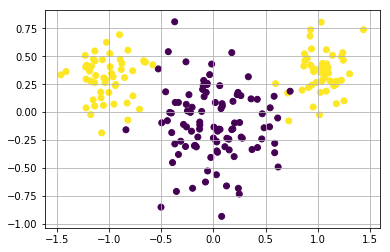

In [25]:
seed = 1
n = 100
mu_A, sigma_A = [1,0.3], 0.2
mu_B, sigma_B = [0,-0.1], 0.3
class_A = np.array([np.concatenate([np.random.randn(1, n//2)*sigma_A-mu_A[0],
                                    np.random.randn(1, n//2)*sigma_A+mu_A[0]], axis=1)[0,:],
                    np.random.randn(n)*sigma_A+mu_A[1]])
class_B = np.array([np.random.randn(n)*sigma_B+mu_B[0], np.random.randn(n)*sigma_B+mu_B[1]])
patterns = np.concatenate((class_A, class_B), axis=1)
targets = np.array([1]*n+[-1]*n)

# Shuffling
np.random.seed(seed)
idx = list(range(patterns.shape[1]))
np.random.shuffle(idx)
patterns = patterns[:,idx]
targets = targets[idx]

plt.scatter(patterns[0,:], patterns[1,:], c=targets)
plt.grid(True)

Scenario 1: Apply delta rule in batch mode + Random 25% from each class (several times).

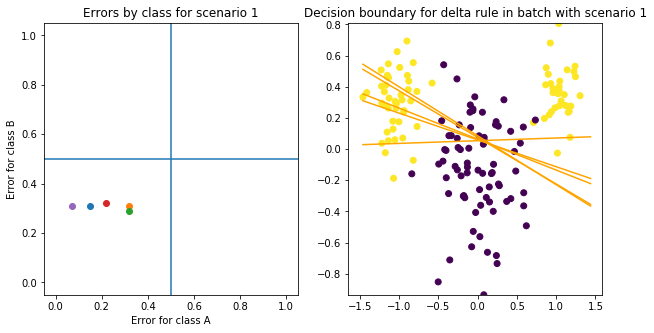

In [26]:
fig = plt.figure(figsize=(10,5))
weights = initialize_weights(n_output=1, n_input=patterns.shape[0]+1, seed=1)
eta = 0.001
epochs = 30
times = 5
for time in range(times):
    
    # Sampling scenario 1
    idx_A = np.where(targets==1)[0]
    idx_B = np.where(targets==-1)[0]
    np.random.seed(time)
    idx_A_sampled = np.random.choice(idx_A, int(n*0.75), replace=False)
    np.random.seed(time)
    idx_B_sampled = np.random.choice(idx_B, int(n*0.75), replace=False)
    idx = np.concatenate((idx_A_sampled, idx_B_sampled))
    patterns_sampled = patterns[:,idx]
    targets_sampled = targets[idx]
    
    # Training with delta rule in batch mode
    weights_dr, error_by_epoch_dr, weights_by_epoch_dr = \
        delta_rule_batch_epochs(patterns_sampled, targets_sampled, weights, eta, epochs)
    
    # Plot error in target by class
    fig.add_subplot(121)
    error_A = np.mean(abs(np.sign(weights_dr@add_bias(patterns[:,idx_A]))-targets[idx_A])/2)
    error_B = np.mean(abs(np.sign(weights_dr@add_bias(patterns[:,idx_B]))-targets[idx_B])/2)   
    plt.scatter(error_A, error_B)
    
    # Plot decision boundary
    fig.add_subplot(122)
    x = np.linspace(min(patterns[0,:]), max(patterns[0,:]), 100)
    w1,w2,w0 = weights_dr[0]
    y = -(w1*x+w0)/w2
    plt.plot(x, y, c="orange")

# Plot error in target by class
fig.add_subplot(121)
plt.ylim((-0.05, 1.05))
plt.xlim((-0.05, 1.05))
plt.xlabel("Error for class A")
plt.ylabel("Error for class B")
plt.title("Errors by class for scenario 1")
plt.axvline(x=0.5)
plt.axhline(y=0.5)

# Plot decision boundary
fig.add_subplot(122)
plt.scatter(patterns_sampled[0,:], patterns_sampled[1,:], c=targets_sampled)
plt.ylim((min(patterns[1,:]), max(patterns[1,:])))
plt.title("Decision boundary for delta rule in batch with scenario 1")

Scenario 2: Apply perceptron learning in batch mode + Random 25% from class A (several times).

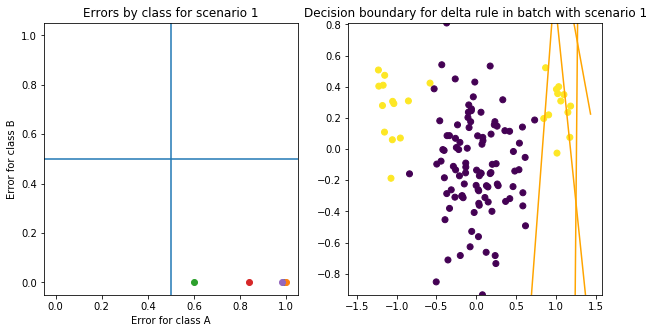

In [27]:
fig = plt.figure(figsize=(10,5))
weights = initialize_weights(n_output=1, n_input=patterns.shape[0]+1, seed=1)
eta = 0.001
epochs = 30
times = 5
for time in range(times):
    
    # Sampling scenario 2
    idx_A = np.where(targets==1)[0]
    idx_B = np.where(targets==-1)[0]
    np.random.seed(time)
    idx_A_sampled = np.random.choice(idx_A, int(n*0.25), replace=False)
    np.random.seed(time)
    idx_B_sampled = idx_B
    idx = np.concatenate((idx_A_sampled, idx_B_sampled))
    patterns_sampled = patterns[:,idx]
    targets_sampled = targets[idx]
    
    # Training with delta rule in batch mode
    weights_dr, error_by_epoch_dr, weights_by_epoch_dr = \
        delta_rule_batch_epochs(patterns_sampled, targets_sampled, weights, eta, epochs)
    
    # Plot error in target by class
    fig.add_subplot(121)
    error_A = np.mean(abs(np.sign(weights_dr@add_bias(patterns[:,idx_A]))-targets[idx_A])/2)
    error_B = np.mean(abs(np.sign(weights_dr@add_bias(patterns[:,idx_B]))-targets[idx_B])/2)   
    plt.scatter(error_A, error_B)
    
    # Plot decision boundary
    fig.add_subplot(122)
    x = np.linspace(min(patterns[0,:]), max(patterns[0,:]), 100)
    w1,w2,w0 = weights_dr[0]
    y = -(w1*x+w0)/w2
    plt.plot(x, y, c="orange")

# Plot error in target by class
fig.add_subplot(121)
plt.ylim((-0.05, 1.05))
plt.xlim((-0.05, 1.05))
plt.xlabel("Error for class A")
plt.ylabel("Error for class B")
plt.title("Errors by class for scenario 1")
plt.axvline(x=0.5)
plt.axhline(y=0.5)

# Plot decision boundary
fig.add_subplot(122)
plt.scatter(patterns_sampled[0,:], patterns_sampled[1,:], c=targets_sampled)
plt.ylim((min(patterns[1,:]), max(patterns[1,:])))
plt.title("Decision boundary for delta rule in batch with scenario 1")

Scenario 3: Apply perceptron learning in batch mode + Random 25% from class B (several times).

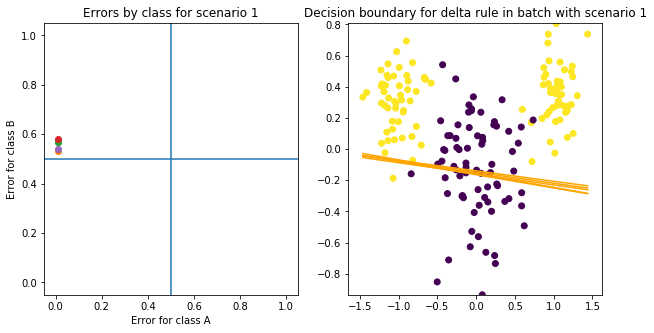

In [28]:
fig = plt.figure(figsize=(10,5))
weights = initialize_weights(n_output=1, n_input=patterns.shape[0]+1, seed=1)
eta = 0.001
epochs = 30
times = 5
for time in range(times):
    
    # Sampling scenario 3
    idx_A = np.where(targets==1)[0]
    idx_B = np.where(targets==-1)[0]
    np.random.seed(time)
    idx_A_sampled = idx_A
    np.random.seed(time)
    idx_B_sampled = np.random.choice(idx_B, int(n*0.75), replace=False)
    idx = np.concatenate((idx_A_sampled, idx_B_sampled))
    patterns_sampled = patterns[:,idx]
    targets_sampled = targets[idx]
    
    # Training with delta rule in batch mode
    weights_dr, error_by_epoch_dr, weights_by_epoch_dr = \
        delta_rule_batch_epochs(patterns_sampled, targets_sampled, weights, eta, epochs)
    
    # Plot error in target by class
    fig.add_subplot(121)
    error_A = np.mean(abs(np.sign(weights_dr@add_bias(patterns[:,idx_A]))-targets[idx_A])/2)
    error_B = np.mean(abs(np.sign(weights_dr@add_bias(patterns[:,idx_B]))-targets[idx_B])/2)   
    plt.scatter(error_A, error_B)
    
    # Plot decision boundary
    fig.add_subplot(122)
    x = np.linspace(min(patterns[0,:]), max(patterns[0,:]), 100)
    w1, w2, w0 = weights_dr[0]
    y = -(w1*x+w0)/w2
    plt.plot(x, y, c="orange")

# Plot error in target by class
fig.add_subplot(121)
plt.ylim((-0.05, 1.05))
plt.xlim((-0.05, 1.05))
plt.xlabel("Error for class A")
plt.ylabel("Error for class B")
plt.title("Errors by class for scenario 1")
plt.axvline(x=0.5)
plt.axhline(y=0.5)

# Plot decision boundary
fig.add_subplot(122)
plt.scatter(patterns_sampled[0,:], patterns_sampled[1,:], c=targets_sampled)
plt.ylim((min(patterns[1,:]), max(patterns[1,:])))
plt.title("Decision boundary for delta rule in batch with scenario 1")

Scenario 4: Apply perceptron learning in batch mode + 20% of class_A < 0 and 80% of class_A > 0 (several times).

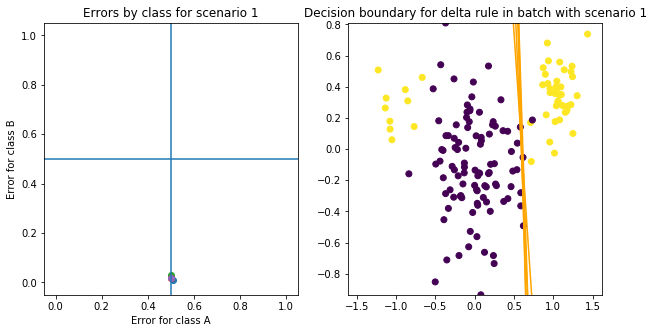

In [29]:
fig = plt.figure(figsize=(10,5))
weights = initialize_weights(n_output=1, n_input=patterns.shape[0]+1, seed=1)
eta = 0.001
epochs = 30
times = 5
for time in range(times):
    
    # Sampling scenario 4
    idx_A = np.where(targets==1)[0]
    idx_A_cond1 = np.where((patterns[0,:] < 0) & (targets==1))[0]
    idx_A_cond2 = np.where((patterns[0,:] > 0) & (targets==1))[0]
    idx_B = np.where(targets==-1)[0]
    np.random.seed(time)
    idx_A_cond1 = np.random.choice(idx_A_cond1, int(0.2*idx_A_cond1.shape[0]), replace=False)
    np.random.seed(time)
    idx_A_cond2 = np.random.choice(idx_A_cond2, int(0.8*idx_A_cond2.shape[0]), replace=False)
    idx_A_sampled = np.concatenate((idx_A_cond1, idx_A_cond2))   
    idx_B_sampled = idx_B
    idx = np.concatenate((idx_A_sampled, idx_B_sampled))
    patterns_sampled = patterns[:,idx]
    targets_sampled = targets[idx]
    
    # Training with delta rule in batch mode
    weights_dr, error_by_epoch_dr, weights_by_epoch_dr = \
        delta_rule_batch_epochs(patterns_sampled, targets_sampled, weights, eta, epochs)
    
    # Plot error in target by class
    fig.add_subplot(121)
    error_A = np.mean(abs(np.sign(weights_dr@add_bias(patterns[:,idx_A]))-targets[idx_A])/2)
    error_B = np.mean(abs(np.sign(weights_dr@add_bias(patterns[:,idx_B]))-targets[idx_B])/2)   
    plt.scatter(error_A, error_B)
    
    # Plot decision boundary
    fig.add_subplot(122)
    x = np.linspace(min(patterns[0,:]), max(patterns[0,:]), 100)
    w1, w2, w0 = weights_dr[0]
    y = -(w1*x+w0)/w2
    plt.plot(x, y, c="orange")

# Plot error in target by class
fig.add_subplot(121)
plt.ylim((-0.05, 1.05))
plt.xlim((-0.05, 1.05))
plt.xlabel("Error for class A")
plt.ylabel("Error for class B")
plt.title("Errors by class for scenario 1")
plt.axvline(x=0.5)
plt.axhline(y=0.5)

# Plot decision boundary
fig.add_subplot(122)
plt.scatter(patterns_sampled[0,:], patterns_sampled[1,:], c=targets_sampled)
plt.ylim((min(patterns[1,:]), max(patterns[1,:])))
plt.title("Decision boundary for delta rule in batch with scenario 1")

## 3.2. Classication and regression with a two-layer perceptron

### 3.2.1 Classification of linearly non-separable data

#### Part 1. Modify the number of hidden nodes and demonstrate the effect the size of the hidden layer has on the performance (both the mean squared error and the number/ratio of misclassifications). How many hidden nodes do you need to perfectly separate all the available data (if manageable at all given your data randomisation)?

Generated linearly non-separable data.

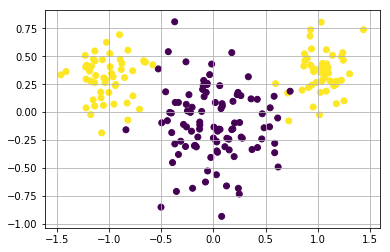

In [30]:
plt.scatter(patterns[0,:], patterns[1,:], c=targets)
plt.grid(True)

Creating function to plot clasification error and MSE in test by epochs and number of hidden nodes.

In [31]:
def backpropagation_errors_test(eta, momentum, epochs_list, n_hidden_list, patterns_train, targets_train,
                                patterns_test, targets_test, title):
    errors = {}
    MSEs = {}
    for epochs in epochs_list:
        errors[epochs] = []
        MSEs[epochs] = []
        for n_hidden in n_hidden_list:
            
            # Training with backpropagation
            weights1 = initialize_weights(n_output=n_hidden, n_input=patterns_train.shape[0]+1, seed=1)
            weights2 = initialize_weights(n_output=1, n_input=n_hidden+1, seed=1)
            weights1, weights2 = backpropagation(patterns_train, targets_train, weights1, weights2, 
                                                 n_hidden, epochs, momentum, eta)
            # Predict test and save errors
            predictions_test = forward(patterns_test, weights1, weights2)
            error = np.mean(abs(np.sign(predictions_test)-targets_test)/2)
            errors[epochs].append(error)
            MSE = np.mean((predictions_test-targets_test)**2)
            MSEs[epochs].append(MSE)
    
    fig = plt.figure(figsize=(10,5))
    for epoch in epochs_list:    
        fig.add_subplot(121)
        plt.plot(n_hidden_list, errors[epoch], label='Epochs='+str(epoch))
        plt.title('Classification error in '+title)
        plt.xlabel("Nº hidden nodes")
        plt.xticks(n_hidden_list)
        plt.ylim(bottom=0)
        plt.legend()
        fig.add_subplot(122)
        plt.plot(n_hidden_list, MSEs[epoch], label='Epochs='+str(epoch))
        plt.title('Mean square error in '+title)
        plt.xlabel("Nº hidden nodes")
        plt.xticks(n_hidden_list)
        plt.ylim(bottom=0)
        plt.legend()

    return(errors, MSEs)

Comparing the effect in error of the number of hidden nodes by epochs.

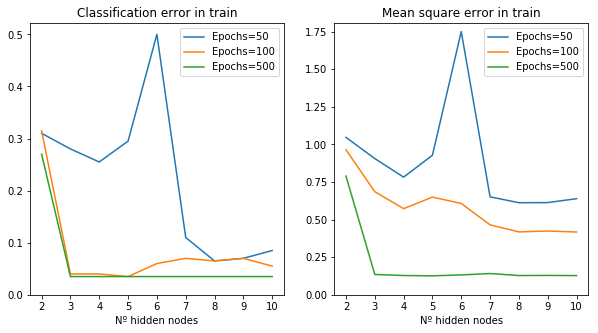

In [32]:
eta = 0.001
momentum = 0.9
epochs_list = [50,100,500]
n_hidden_list = np.arange(2, 11)
backpropagation_errors_test(eta, momentum, epochs_list, n_hidden_list, patterns, targets, patterns, 
                            targets, title="train")

#### Part 2. How do the learning/error curves for the training and the validation sets compare? Are they similar? In what cases do you observe more dissimilarity? How do these curves and the network performance depend on the size of the hidden layer in various training/validation data configurations (the aforementioned subsampling options)?

- Scenario 1: Apply delta rule in batch mode + Random 25% from each class (several times).

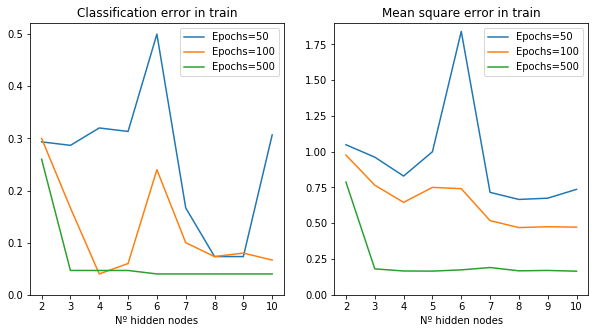

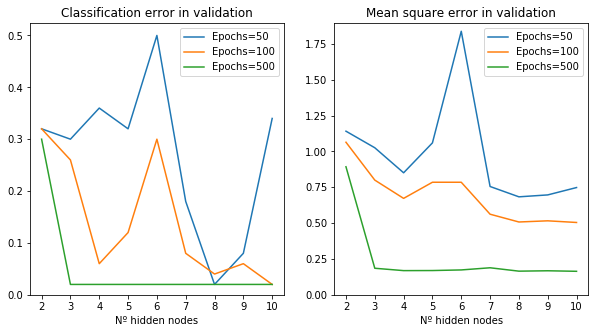

In [33]:
# Sampling scenario 1
idx_A = np.where(targets==1)[0]
idx_B = np.where(targets==-1)[0]
np.random.seed(1)
idx_A_sampled = np.random.choice(idx_A, int(n*0.75), replace=False)
np.random.seed(1)
idx_B_sampled = np.random.choice(idx_B, int(n*0.75), replace=False)
idx_train = np.concatenate((idx_A_sampled, idx_B_sampled))
idx_validation = [i for i in range(patterns.shape[1]) if i not in idx_train]
patterns_train = patterns[:,idx_train]
targets_train = targets[idx_train]
patterns_validation = patterns[:,idx_validation]
targets_validation = targets[idx_validation]

# Train
backpropagation_errors_test(eta, momentum, epochs_list, n_hidden_list, patterns_train, targets_train,
                            patterns_train, targets_train, title="train")
# Test
backpropagation_errors_test(eta, momentum, epochs_list, n_hidden_list, patterns_train, targets_train,
                            patterns_validation, targets_validation, title="validation")

- Scenario 2: Apply perceptron learning in batch mode + Random 25% from class A (several times).

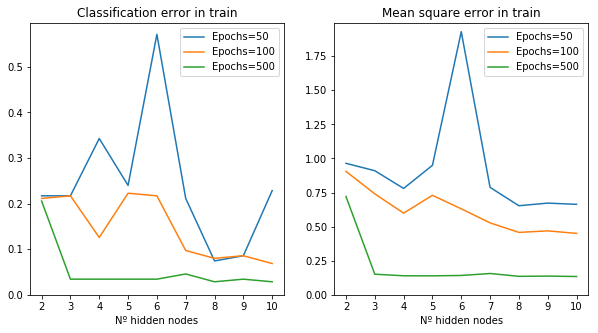

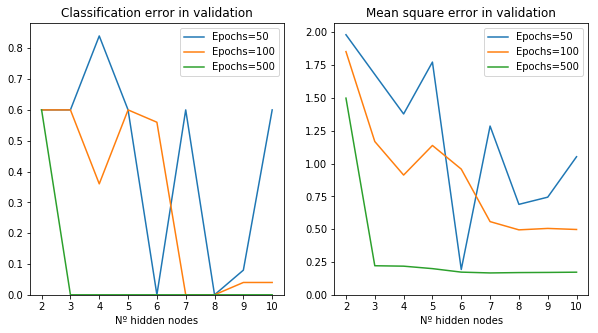

In [34]:
# Sampling scenario 2
idx_A = np.where(targets==1)[0]
idx_B = np.where(targets==-1)[0]
np.random.seed(1)
idx_A_sampled = np.random.choice(idx_A, int(n*0.75), replace=False)
np.random.seed(1)
idx_B_sampled = idx_B
idx_train = np.concatenate((idx_A_sampled, idx_B_sampled))
idx_validation = [i for i in range(patterns.shape[1]) if i not in idx_train]
patterns_train = patterns[:,idx_train]
targets_train = targets[idx_train]
patterns_validation = patterns[:,idx_validation]
targets_validation = targets[idx_validation]

# Train
backpropagation_errors_test(eta, momentum, epochs_list, n_hidden_list, patterns_train, targets_train,
                            patterns_train, targets_train, title="train")

# Test
backpropagation_errors_test(eta, momentum, epochs_list, n_hidden_list, patterns_train, targets_train,
                            patterns_validation, targets_validation, title="validation")

- Scenario 3: Apply perceptron learning in batch mode + Random 50% from class B (several times).

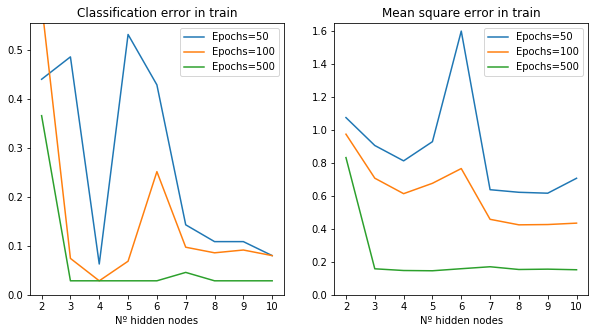

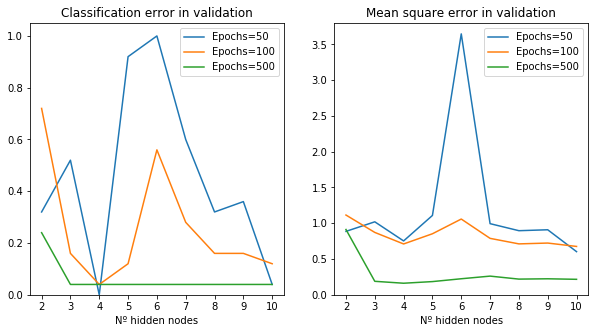

In [35]:
# Sampling scenario 3
idx_A = np.where(targets==1)[0]
idx_B = np.where(targets==-1)[0]
np.random.seed(1)
idx_A_sampled = idx_A
np.random.seed(1)
idx_B_sampled = np.random.choice(idx_B, int(n*0.75), replace=False)
idx_train = np.concatenate((idx_A_sampled, idx_B_sampled))
idx_validation = [i for i in range(patterns.shape[1]) if i not in idx_train]
patterns_train = patterns[:,idx_train]
targets_train = targets[idx_train]
patterns_validation = patterns[:,idx_validation]
targets_validation = targets[idx_validation]

# Train
backpropagation_errors_test(eta, momentum, epochs_list, n_hidden_list, patterns_train, targets_train,
                            patterns_train, targets_train, title="train")
# Test
backpropagation_errors_test(eta, momentum, epochs_list, n_hidden_list, patterns_train, targets_train,
                            patterns_validation, targets_validation, title="validation")

- Scenario 4: Apply perceptron learning in batch mode + 20% of class_A < 0 and 80% of class_A > 0 (several times).

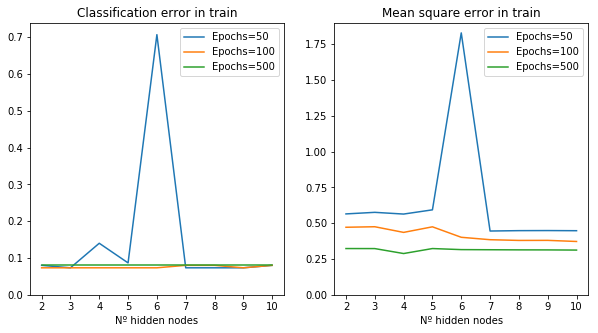

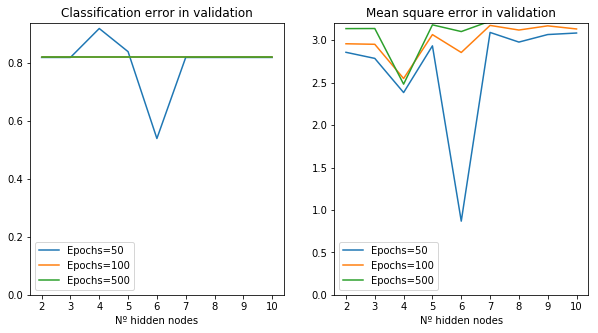

In [36]:
# Sampling scenario 4
idx_A = np.where(targets==1)[0]
idx_A_cond1 = np.where((patterns[0,:] < 0) & (targets==1))[0]
idx_A_cond2 = np.where((patterns[0,:] > 0) & (targets==1))[0]
idx_B = np.where(targets==-1)[0]
np.random.seed(time)
idx_A_cond1 = np.random.choice(idx_A_cond1, int(0.2*idx_A_cond1.shape[0]), replace=False)
np.random.seed(time)
idx_A_cond2 = np.random.choice(idx_A_cond2, int(0.8*idx_A_cond2.shape[0]), replace=False)
idx_A_sampled = np.concatenate((idx_A_cond1, idx_A_cond2))   
np.random.seed(1)
idx_B_sampled = idx_B
idx_train = np.concatenate((idx_A_sampled, idx_B_sampled))
idx_validation = [i for i in range(patterns.shape[1]) if i not in idx_train]
patterns_train = patterns[:,idx_train]
targets_train = targets[idx_train]
patterns_validation = patterns[:,idx_validation]
targets_validation = targets[idx_validation]

# Train
backpropagation_errors_test(eta, momentum, epochs_list, n_hidden_list, patterns_train, targets_train,
                            patterns_train, targets_train, title="train")

# Test
backpropagation_errors_test(eta, momentum, epochs_list, n_hidden_list, patterns_train, targets_train,
                            patterns_validation, targets_validation, title="validation")

#### Make an attempt at approximating the resulting decision boundary, i.e. where the network output is 0 (between the target labels of -1 and 1 for two classes, respectively).

Raw predictions and hidden layer decision boundaries with 2 hidden layers, 1000 epochs, 0.001 eta and 0.9 momentum.

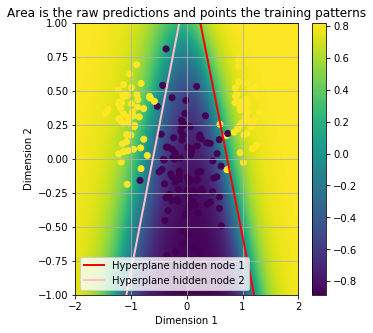

In [37]:
n_hidden = 2
epochs = 1000
momentum = 0.9
eta = 0.001

# Training with backpropagation
weights1 = initialize_weights(n_output=n_hidden, n_input=patterns_train.shape[0]+1, seed=1)
weights2 = initialize_weights(n_output=1, n_input=n_hidden+1, seed=1)
weights1, weights2 = \
    backpropagation(patterns, targets, weights1, weights2, n_hidden, epochs, momentum, eta)

# Plot the raw predictions
fig = plt.figure(figsize=(5,5))
x, y = np.mgrid[slice(-2, 2, 0.01), slice(-1, 1, 0.01)]
x, y = np.concatenate(x), np.concatenate(y)
patterns_plot = np.array([x,y])
predictions_plot = forward(patterns_plot, weights1, weights2)
plt.scatter(patterns_plot[0,:], patterns_plot[1,:], c=predictions_plot[0,:])
plt.colorbar()

# Plot hidden layer decision boundaries
w11, w12, bias1 = weights1[0,0], weights1[0,1], weights1[0,2]
w21, w22, bias2 = weights1[1,0], weights1[1,1], weights1[1,2]
x = np.linspace(-2, 2, 1000)
plt.plot(x, -(w11*x+bias1)/w12, c="red", label="Hyperplane hidden node 1", linewidth=2)
plt.plot(x, -(w21*x+bias2)/w22, c="pink", label="Hyperplane hidden node 2", linewidth=2)

# Plot the true targets and rest of plot details
plt.scatter(patterns[0,:], patterns[1,:], c=targets)
plt.title("Area is the raw predictions and points the training patterns")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.xlim((-2,2))
plt.ylim((-1,1))
plt.legend()
plt.grid(True)

### 3.2.2. Encoder Problem

#### Please, use your implementation of the generalised Delta rule to train the network until the learning converges (it does not necessarily have to imply that the mean squared error is 0 but that the rounded outputs match the corresponding inputs).

#### 1. Does the network always converge and map inputs to themselves?

Grid search to find epochs and etas with error 0 (convergence).

In [38]:
def number_mistakes(patterns, targets, weights1, weights2):
    predictions = forward(patterns, weights1, weights2)
    error = targets.shape[1]-np.sum(np.sum(np.round(predictions)==targets, axis=0)==targets.shape[0])
    
    return(error)

In [39]:
patterns = np.array([[1,-1,-1,-1,-1,-1,-1,-1],
                     [-1,1,-1,-1,-1,-1,-1,-1],
                     [-1,-1,1,-1,-1,-1,-1,-1],
                     [-1,-1,-1,1,-1,-1,-1,-1],
                     [-1,-1,-1,-1,1,-1,-1,-1],
                     [-1,-1,-1,-1,-1,1,-1,-1],
                     [-1,-1,-1,-1,-1,-1,1,-1],
                     [-1,-1,-1,-1,-1,-1,-1,1]])
targets = patterns
n_hidden = 3
momentum = 0.9
weights1 = initialize_weights(n_output=n_hidden, n_input=patterns.shape[0]+1, seed=1)
weights2 = initialize_weights(n_output=targets.shape[0], n_input=n_hidden+1, seed=1)

# Grid search
eta_list = [0.00001,0.0001,0.001,0.01,0.1]
epochs_list = [100,1000,10000,20000]
min_error = targets.shape[1]
optimal_eta = -1
optimal_epochs = -1
for eta in eta_list:
    for epochs in epochs_list:
        
        # Training with backpropagation
        weights1, weights2 = \
            backpropagation(patterns, targets, weights1, weights2, n_hidden, epochs, momentum, eta)
        
        # Computing the error
        error = number_mistakes(patterns, targets, weights1, weights2)
        if error<min_error:
            optimal_eta = eta
            optimal_epochs = epochs 
            min_error = error
        if min_error==0:
            break
print("The optimal eta is: "+str(optimal_eta))
print("The optimal epochs is: "+str(optimal_epochs))
print("The number of missclassified patterns is: "+str(min_error))

The optimal eta is: 0.01
The optimal epochs is: 10000
The number of missclassified patterns is: 0


#### 2. How does the internal code look, what does it represent? For that, you can inspect the activations of the hidden layer corresponding to input patterns. You could also examine the weight matrix for the first layer. Can you deduce anything from the sign of the weights?

All patterns have different activated output vector (3 hidden nodes) after encoding (and applying the sign function), it means that each patterns maps to a different vector in the new space. Note: For encoding 8 digits you need 3 bits of information.

In [40]:
# Forward pass until hidden layer activations
hidden_summatory_input = weights1@add_bias(patterns)
hidden_activated_output = add_bias(activation(hidden_summatory_input))
print(np.sign(hidden_activated_output[range(n_hidden),:]))

[[ 1.  1. -1. -1.  1. -1.  1. -1.]
 [ 1.  1. -1. -1. -1.  1. -1.  1.]
 [-1.  1. -1.  1.  1.  1. -1. -1.]]


#### Part 3. What happens when the size of the hidden layer is two instead of three, i.e. the architecture is 8-2-8?

In [41]:
patterns = np.array([[1,-1,-1,-1,-1,-1,-1,-1],
                     [-1,1,-1,-1,-1,-1,-1,-1],
                     [-1,-1,1,-1,-1,-1,-1,-1],
                     [-1,-1,-1,1,-1,-1,-1,-1],
                     [-1,-1,-1,-1,1,-1,-1,-1],
                     [-1,-1,-1,-1,-1,1,-1,-1],
                     [-1,-1,-1,-1,-1,-1,1,-1],
                     [-1,-1,-1,-1,-1,-1,-1,1]])
targets = patterns
n_hidden = 2
momentum = 0.9
weights1 = initialize_weights(n_output=n_hidden, n_input=patterns.shape[0]+1, seed=1)
weights2 = initialize_weights(n_output=targets.shape[0], n_input=n_hidden+1, seed=1)

# Grid search
eta_list = [0.00001,0.0001,0.001,0.01,0.1]
epochs_list = [100,1000,10000,20000]
min_error = targets.shape[1]
optimal_eta = -1
optimal_epochs = -1
for eta in eta_list:
    for epochs in epochs_list:
        
        # Training with backpropagation
        weights1, weights2 = \
            backpropagation(patterns, targets, weights1, weights2, n_hidden, epochs, momentum, eta)
        
        # Computing the error
        error = number_mistakes(patterns, targets, weights1, weights2)
        if error<min_error:
            optimal_eta = eta
            optimal_epochs = epochs 
            min_error = error
        if min_error==0:
            break
print("The optimal eta is: "+str(optimal_eta))
print("The optimal epochs is: "+str(optimal_epochs))
print("The number of missclassified patterns is: "+str(min_error))

The optimal eta is: 0.1
The optimal epochs is: 10000
The number of missclassified patterns is: 0


Not all patterns have different activated output vector (2 hidden nodes) after encoding (and applying the sign function), it means that some patterns maps to a replicated vector in the new space.

In [42]:
# Forward pass until hidden layer activations
hidden_summatory_input = weights1@add_bias(patterns)
hidden_activated_output = add_bias(activation(hidden_summatory_input))
print(np.sign(hidden_activated_output[range(n_hidden),:]))

[[ 1. -1. -1.  1. -1. -1.  1.  1.]
 [-1.  1. -1.  1. -1.  1.  1. -1.]]


## 3.3. Function approximation

#### Part 0. Generate function data.

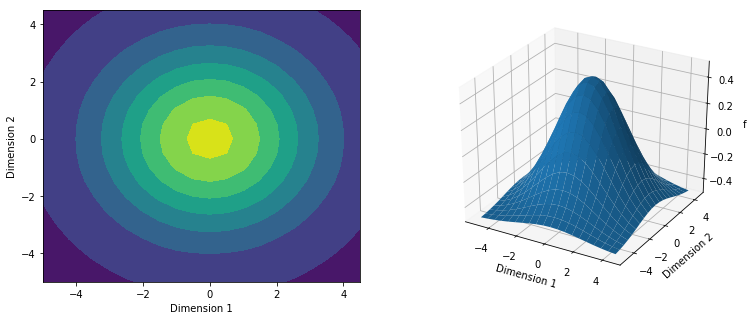

In [43]:
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
xx, yy = np.meshgrid(x, y)
f = lambda x,y: np.exp(-(x**2+y**2)/10)-0.5
zz = f(xx, yy)

# 2D
fig = plt.figure(figsize=(12.5,5))
fig2d = fig.add_subplot(1,2,1)
fig2d.contourf(xx, yy, zz)
fig2d.set_xlabel("Dimension 1")
fig2d.set_ylabel("Dimension 2")

# 3D
fig3d = fig.add_subplot(1, 2, 2, projection='3d')
fig3d.plot_surface(xx, yy, zz)
fig3d.set_xlabel("Dimension 1")
fig3d.set_ylabel("Dimension 2")
fig3d.set_zlabel("f")

#### Part 1. Train the network and visualise the approximated function. Please, experiment with different number of nodes in the hidden layer to see how this parameter affects the final representation.

Let's see the optimal number of hidden nodes  in training for eta=0.001 and epochs=100.

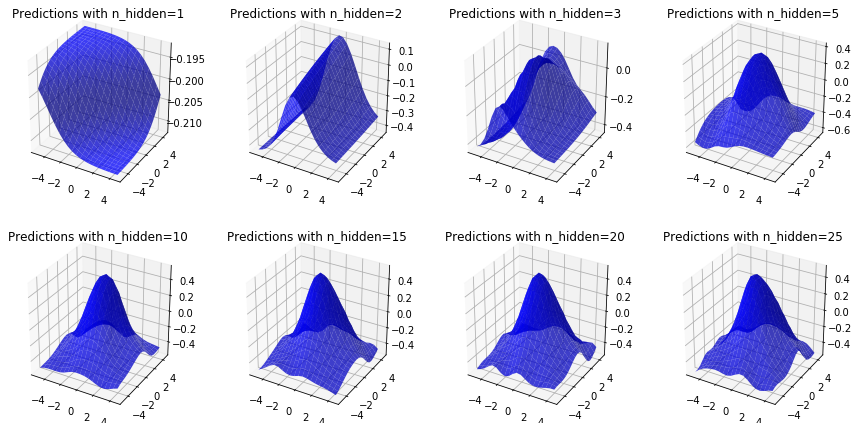

In [44]:
n = len(x)*len(y)
targets = zz.reshape(1, n)
patterns = np.vstack((xx.reshape(1, n), yy.reshape(1, n)))
eta = 0.01
epochs = 100
momentum = 0.9
n_hidden_list = [1,2,3,5,10,15,20,25]
fig = plt.figure(figsize=(15,7.5))
plot = 1
for n_hidden in n_hidden_list:
    
    # Training with backpropagation
    weights1 = initialize_weights(n_output=n_hidden, n_input=patterns.shape[0]+1, seed=1)
    weights2 = initialize_weights(n_output=targets.shape[0], n_input=n_hidden+1, seed=1)
    weights1, weights2 = \
        backpropagation(patterns, targets, weights1, weights2, n_hidden, epochs, momentum, eta)
    
    # Plot the predictions in 3D
    ax3d = fig.add_subplot(2, 4, plot, projection='3d')
    plot += 1
    ax3d.plot_surface(xx, yy, forward(patterns, weights1, weights2).reshape(20, 20), color="blue", 
                      alpha=0.75, label="Predictions")
    ax3d.set_title("Predictions with n_hidden="+str(n_hidden))

##### Part 2. Evaluate generalisation performance.

1. Vary the number of nodes in the hidden layer from 1 to 25 and try to observe any trends. What happens when you have very few (less than 5) or very many (more than 20) hidden nodes? Can you explain your observations? Try to make a model comparison - what error estimates and how would you compare them to identify the "best" model?

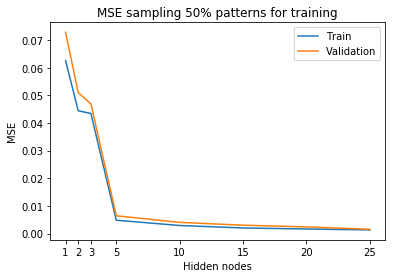

In [45]:
# Sampling
idx_train = np.random.choice(range(n), int(n*0.5), replace=False)
idx_validation = [i for i in range(n) if i not in idx_train]
patterns_train = patterns[:,idx_train]
targets_train = targets[0,idx_train]
patterns_validation = patterns[:,idx_validation]
targets_validation = targets[0,idx_validation]

n_hidden_list = [1,2,3,5,10,15,20,25]
mses_train = []
mses_validation = []
for n_hidden in n_hidden_list:
    
    # Training with backpropagation
    weights1 = initialize_weights(n_output=n_hidden, n_input=patterns.shape[0]+1, seed=1)
    weights2 = initialize_weights(n_output=targets.shape[0], n_input=n_hidden+1, seed=1)
    weights1, weights2 = backpropagation(patterns_train, targets_train, weights1, weights2, n_hidden,
                                         epochs, momentum, eta)
    
    # Computing the MSE in train
    predictions_train = forward(patterns_train, weights1, weights2)
    mse_train = np.mean((predictions_train-targets_train)**2)
    mses_train.append(mse_train)
    
    # Computing the MSE in validation
    predictions_validation = forward(patterns_validation, weights1, weights2)
    mse_validation = np.mean((predictions_validation-targets_validation)**2)
    mses_validation.append(mse_validation)

# Plot the MSE
plt.plot(n_hidden_list, mses_train, label="Train")
plt.plot(n_hidden_list, mses_validation, label="Validation")
plt.xlabel("Hidden nodes")
plt.ylabel("MSE")
plt.xticks(n_hidden_list)
plt.title("MSE sampling 50% patterns for training")
plt.legend()

- Selecting 5 hidden nodes, let's find the optimal learning rate and epochs (using validation MSE).

In [46]:
n_hidden = 5
weights1 = initialize_weights(n_output=n_hidden, n_input=patterns.shape[0]+1, seed=1)
weights2 = initialize_weights(n_output=targets.shape[0], n_input=n_hidden+1, seed=1)

# Grid search
eta_list = [0.00001,0.0001,0.001,0.01,0.1]
epochs_list = [100,1000,10000,20000]
min_error = np.inf
optimal_eta = -1
optimal_epochs = -1
for eta in eta_list:
    for epochs in epochs_list:
        
        # Training with backpropagation
        weights1, weights2 = \
            backpropagation(patterns, targets, weights1, weights2, n_hidden, epochs, momentum, eta)
        
        # Computing the MSE in validation
        predictions_validation = forward(patterns_validation, weights1, weights2)
        mse_validation = np.mean((predictions_validation-targets_validation)**2)
        if mse_validation<min_error:
            optimal_eta = eta
            optimal_epochs = epochs 
            min_error = mse_validation
        if min_error==0:
            break
print("The optimal eta is: "+str(optimal_eta))
print("The optimal epochs is: "+str(optimal_epochs))
print("The optimal MSE is: "+str(min_error))

The optimal eta is: 0.1
The optimal epochs is: 20000
The optimal MSE is: 0.00016599367441603102


- Let's plot the predictions with the optimal parameters.

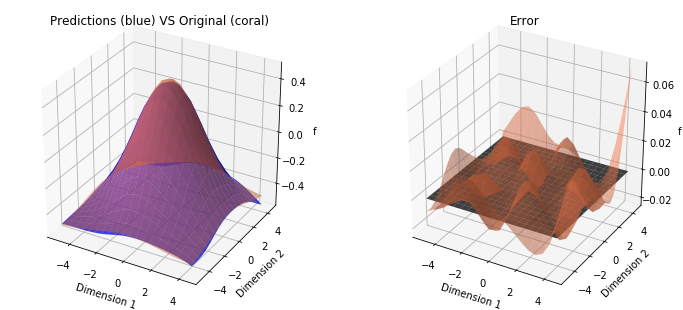

In [47]:
epochs = optimal_epochs
eta = optimal_eta

# Training with backpropagation
weights1,weights2 = backpropagation(patterns, targets, weights1, weights2, n_hidden, epochs, momentum, eta)

# Predicting all patterns
predictions = forward(patterns, weights1, weights2)

# 3D predictions
fig = plt.figure(figsize=(12,12))
fig3d = fig.add_subplot(2, 2, 1, projection='3d')
fig3d.plot_surface(xx, yy, zz, color="coral", alpha=0.5)
fig3d.plot_surface(xx, yy, predictions.reshape(20, 20), color="blue", alpha=0.75)
fig3d.set_xlabel("Dimension 1")
fig3d.set_ylabel("Dimension 2")
fig3d.set_zlabel("f")
fig3d.set_title("Predictions (blue) VS Original (coral)")

# 3D error
fig3d = fig.add_subplot(2, 2, 2, projection='3d')
fig3d.plot_surface(xx, yy, zz-predictions.reshape(20, 20), color="coral", alpha=0.5)
fig3d.plot_surface(xx, yy, np.zeros((20,20)), color="black", alpha=0.75)
fig3d.set_xlabel("Dimension 1")
fig3d.set_ylabel("Dimension 2")
fig3d.set_zlabel("f")
fig3d.set_title("Error")

2. For the selected best model, run experiments with varying number of the training samples, e.g. from 80% down to 20% of all the dataset.

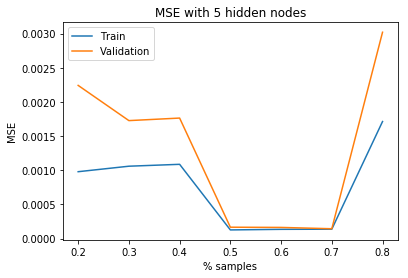

In [48]:
n_hidden = 5
nsamps = np.linspace(0.2, 0.8, 7, endpoint=True)
mses_train = []
mses_validation = []
for nsamp in nsamps:
    
    # Sampling
    idx_train = np.random.choice(range(n), int(n*nsamp), replace=False)
    idx_validation = [i for i in range(n) if i not in idx_train]
    patterns_train = patterns[:,idx_train]
    targets_train = targets[0,idx_train]
    patterns_validation = patterns[:,idx_validation]
    targets_validation = targets[0,idx_validation]
    
    # Training with backpropagation
    weights1 = initialize_weights(n_output=n_hidden, n_input=patterns.shape[0]+1, seed=1)
    weights2 = initialize_weights(n_output=targets.shape[0], n_input=n_hidden+1, seed=1)
    weights1, weights2 = \
        backpropagation(patterns_train, targets_train, weights1, weights2, n_hidden, epochs, momentum,eta)
    
    # Computing the MSE in train
    predictions_train = forward(patterns_train, weights1, weights2)
    mse_train = np.mean((predictions_train-targets_train)**2)
    mses_train.append(mse_train)
    
    # Computing the MSE in validation
    predictions_validation = forward(patterns_validation,weights1,weights2)
    mse_validation = np.mean((predictions_validation-targets_validation)**2)
    mses_validation.append(mse_validation)

# Plot the MSE
plt.plot(nsamps, mses_train, label="Train")
plt.plot(nsamps, mses_validation, label="Validation")
plt.xlabel("% samples")
plt.ylabel("MSE")
plt.xticks(nsamps)
plt.title("MSE with 5 hidden nodes")
plt.legend()

3. For the best model, can you speed up the convergence withiout compromising the generalisation performance?

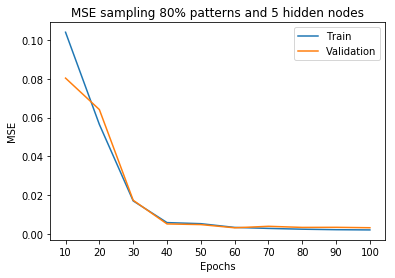

In [49]:
# Sampling
nsamp = 0.8
idx_train = np.random.choice(range(n), int(n*nsamp), replace=False)
idx_validation = [i for i in range(n) if i not in idx_train]
patterns_train = patterns[:,idx_train]
targets_train = targets[0,idx_train]
patterns_validation = patterns[:,idx_validation]
targets_validation = targets[0,idx_validation]

epochs_list = [10,20,30,40,50,60,70,80,90,100]
mses_train = []
mses_validation = []
for epochs in epochs_list:
    
    # Training with backpropagation
    weights1 = initialize_weights(n_output=n_hidden, n_input=patterns.shape[0]+1, seed=1)
    weights2 = initialize_weights(n_output=targets.shape[0], n_input=n_hidden+1, seed=1)
    weights1, weights2 = \
        backpropagation(patterns_train, targets_train, weights1, weights2, n_hidden, epochs, momentum,eta)
    
    # Computing the MSE in train
    predictions_train = forward(patterns_train, weights1, weights2)
    mse_train = np.mean((predictions_train-targets_train)**2)
    mses_train.append(mse_train)
    
    # Computing the MSE in validation
    predictions_validation = forward(patterns_validation, weights1, weights2)
    mse_validation = np.mean((predictions_validation-targets_validation)**2)
    mses_validation.append(mse_validation)

# Plot the MSE
plt.plot(epochs_list, mses_train, label="Train")
plt.plot(epochs_list, mses_validation, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.xticks(epochs_list)
plt.title("MSE sampling 80% patterns and 5 hidden nodes")
plt.legend()

# 4. Assignment - Part 2

Import packages.

In [50]:
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
import time

Using TensorFlow backend.


## 4.1. Data

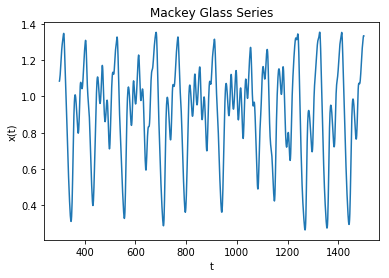

In [51]:
def mackey_glass(max_time, beta=0.2, gamma=0.1, n=10, theta=25):
    x = np.empty(max_time+1)
    x[0] = 1.5
    for t in range(1, max_time+1):
        x_1 = x[t-1]
        x_theta = 0 if t<theta else x[t-theta]
        x[t] = x_1+(beta*x_theta)/(1+x_theta**n)-gamma*x_1
    return x

t = np.arange(301, 1501)
x = mackey_glass(1506)
plt.plot(t, x[t])
plt.title("Mackey Glass Series")
plt.xlabel("t")
plt.ylabel("x(t)")

The selected 1200 samples should now be divided into three consecutive non-overlapping blocks for training, validation and testing.

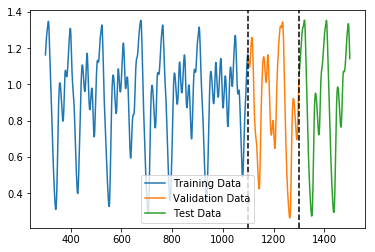

In [52]:
patterns = np.array([x[t-lag] for lag in [20,15,10,5,0]])
targets = x[t+5]
n_train = 800
n_val = 1000
n_test = 1200
patterns_train, targets_train = patterns[:,0:n_train], targets[0:n_train].reshape(1, n_train)
patterns_val, targets_val  = patterns[:,n_train:n_val], targets[n_train:n_val].reshape(1, n_val-n_train)
patterns_test, targets_test  = patterns[:,n_val:n_test], targets[n_val:n_test].reshape(1, n_test-n_val)

plt.plot(t[:n_train], targets_train[0,:], label="Training Data")
plt.plot(t[n_train:n_val], targets_val[0,:], label="Validation Data")
plt.plot(t[n_val:n_test], targets_test[0,:], label="Test Data")
plt.axvline(t[0]+n_train, color='k', linestyle='--')
plt.axvline(t[0]+n_val, color='k', linestyle='--')
plt.legend()

## 4.3. Simulations and evaluation

### 4.3.1. Two-layer perceptron for time series prediction - model selection, regularisation and validation

#### Part 2. Training a neural network for different configurations (e.g., the number of hidden nodes, strength of regularisation etc.) with the use of early stopping based on the validation error and a regularisation technique of your own choice.

Define the class of the model with train, predict and weights functions.

In [53]:
DEFAULT_HIDDEN_NODES = 10
DEFAULT_HIDDEN_NODES_2 = None
DEFAULT_LEARNING_RATE = 0.1
DEFAULT_LEARNING_MOMENTUM = 0.9
DEFAULT_REGULARIZATION = 0.0001
DEFAULT_STOP_EARLY = True
DEFAULT_STOP_ITERATIONS = 10
DEFAULT_EPOCHS = 100
DEFAULT_TRAINING_NOISE = None

class TimeSeriesPredictor:
    def __init__(self,
                 inputs,
                 outputs,
                 hidden_nodes=DEFAULT_HIDDEN_NODES,
                 hidden_nodes_2=DEFAULT_HIDDEN_NODES_2,
                 learning_rate=DEFAULT_LEARNING_RATE,
                 learning_momentum=DEFAULT_LEARNING_MOMENTUM,
                 regularization=DEFAULT_REGULARIZATION,
                 stop_early=DEFAULT_STOP_EARLY,
                 stop_iterations=DEFAULT_STOP_ITERATIONS
                ):

        self.stop_iterations = stop_iterations
        self.stop_early = stop_early
        self._trained = False
        self.hidden_layer = Dense(
            hidden_nodes,
            input_shape=(inputs,),
            activation='sigmoid',
            use_bias=True,
            kernel_regularizer=l2(regularization)
        )
        self.output_layer = Dense(
            outputs,
            use_bias=True,
            kernel_regularizer=l2(regularization)
        )
        if hidden_nodes_2 is not None:
            self.hidden_layer_2 = Dense(
                hidden_nodes_2,
                activation='sigmoid',
                use_bias=True,
                kernel_regularizer=l2(regularization)
            )
            self.model = Sequential([self.hidden_layer, self.hidden_layer_2, self.output_layer])
        else:
            self.model = Sequential([self.hidden_layer, self.output_layer])
        sgd = optimizers.SGD(lr=learning_rate, momentum=learning_momentum)
        self.model.compile(optimizer=sgd, loss='mean_squared_error')
    
    def train(self,
              patterns_train,
              targets_train,
              patterns_val,
              targets_val,
              epochs=DEFAULT_EPOCHS,
              noise=DEFAULT_TRAINING_NOISE):
        
        inputs = patterns_train.copy()
        labels = targets_train.copy()
        if noise is not None and noise > 0:
            inputs += noise*np.random.randn(*inputs.shape)
        if self.stop_early:
            stop_early_callback = EarlyStopping(
                monitor='val_loss',
                patience=self.stop_iterations
            )
            callbacks=[stop_early_callback]
            self.model.fit(inputs.T,
                       labels.T,
                       batch_size=inputs.shape[1],
                       callbacks=callbacks,
                       validation_data=[patterns_val.T,targets_val.T],
                       epochs=epochs,
                       verbose=0)
        else:
            self.model.fit(inputs.T,
                       labels.T,
                       batch_size=inputs.shape[1],
                       epochs=epochs,
                       verbose=0)
        

    def predict(self, patterns):
        predictions = self.model.predict(patterns.T)
        
        return predictions

    def weights(self):
        w1, w2 = self.hidden_layer.get_weights()
        w3, w4 = self.output_layer.get_weights()
        
        return np.concatenate((w1.flatten(), w2, w3.flatten(), w4))

Define the fucntion to evaluate different regularizations and hidden nodes.

In [54]:
def evaluate_reg_nodes(patterns_train,
                       patterns_val,
                       targets_train,
                       targets_val,
                       hidden_nodes_list=DEFAULT_HIDDEN_NODES,
                       regularization_list=DEFAULT_REGULARIZATION,
                       learning_rate=DEFAULT_LEARNING_RATE,
                       learning_momentum=DEFAULT_LEARNING_MOMENTUM,
                       stop_early=DEFAULT_STOP_EARLY,
                       stop_iterations=DEFAULT_STOP_ITERATIONS,
                       epochs=DEFAULT_EPOCHS,
                       training_noise=DEFAULT_TRAINING_NOISE
                      ):
    
    plt.figure(figsize=(5,5))
    for reg in regularization_list:
        errors = []
        for hidden_nodes in hidden_nodes_list:
            model = TimeSeriesPredictor(inputs=5,
                                        outputs=1,
                                        hidden_nodes=hidden_nodes,
                                        learning_rate=learning_rate,
                                        learning_momentum=learning_momentum,
                                        regularization=reg,
                                        stop_early=stop_early,
                                        stop_iterations=stop_iterations
                                       )          
            model.train(patterns_train, targets_train, patterns_val, targets_val, epochs=epochs,
                        noise=training_noise)
            predictions_val = model.predict(patterns_val).T
            mse = np.mean((predictions_val-targets_val)**2)
            errors.append(mse)
        plt.plot(hidden_nodes_list, errors, marker='x', label="reg="+str(reg))
    plt.xlabel("Hidden Nodes")
    plt.ylabel("MSE in validation")
    plt.legend()
    plt.grid()

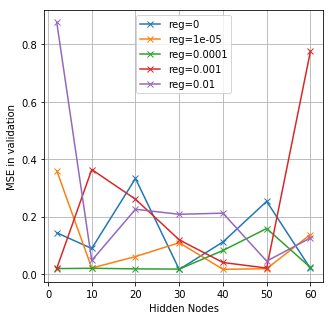

In [55]:
evaluate_reg_nodes(patterns_train,
                   patterns_val,
                   targets_train,
                   targets_val,
                   hidden_nodes_list=[2,10,20,30,40,50,60],
                   regularization_list=[0,1e-5,1e-4,1e-3,1e-2]
                  )

#### Part 3. What is the effect of regularisation on the distribution of weights? To address the latter question, please make a histogram of weights (without biases) for different regularisation strengths.

Define the fucntion to evaluate different regularizations and hidden nodes.

In [56]:
def evaluate_weight_distribution(patterns_train,
                                 patterns_val,
                                 targets_train,
                                 targets_val,
                                 hidden_nodes=DEFAULT_HIDDEN_NODES,
                                 learning_rate=DEFAULT_LEARNING_RATE,
                                 learning_momentum=DEFAULT_LEARNING_MOMENTUM,
                                 regularization_list=DEFAULT_REGULARIZATION,
                                 stop_early=DEFAULT_STOP_EARLY,
                                 stop_iterations=DEFAULT_STOP_ITERATIONS,
                                 epochs=DEFAULT_EPOCHS,
                                 training_noise=DEFAULT_TRAINING_NOISE
                                ):
    
    plt.figure(figsize=(5,5))
    for reg in regularization_list:
        model = TimeSeriesPredictor(inputs=5,
                                    outputs=1,
                                    hidden_nodes=hidden_nodes,
                                    learning_rate=learning_rate,
                                    learning_momentum=learning_momentum,
                                    regularization=reg,
                                    stop_early=stop_early,
                                    stop_iterations=stop_iterations
                                   )          
        model.train(patterns_train, targets_train, patterns_val, targets_val, epochs=epochs,
                    noise=training_noise)
        plt.hist(model.weights(), alpha=0.5, label="reg="+str(reg))
    plt.xlabel("Weight value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()

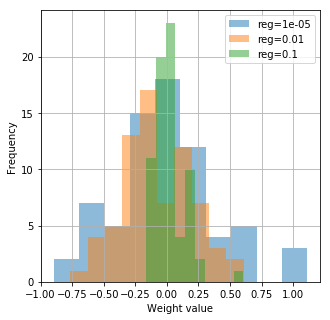

In [57]:
evaluate_weight_distribution(patterns_train,
                             patterns_val,
                             targets_train,
                             targets_val,
                             regularization_list=[1e-5, 0.01, 0.1])

#### Part 4. Final evaluation of the selected model on a test set - the conclusive estimate of the generalisation error on the unseen data subset. Plotting these test predictions along with the known target values (and/or plotting the difference between the predictions made by your multi-layer perceptron and the corresponding true time series samples).

In [58]:
def evaluate_generalization(t, patterns, targets, model):
    predictions = model.predict(patterns).T
    mse = np.mean((predictions-targets)**2)
    plt.figure(figsize=(5,5))
    plt.plot(t, targets[0,:]-np.mean(targets), label="Target (Standardized)")
    plt.plot(t, predictions[0,:]-np.mean(predictions), label="Prediction (Standardized)")
    plt.plot(t, np.abs(targets[0,:]-predictions[0,:]), label="|Target - Prediction|")
    plt.title("MSE="+str(np.round(mse,4))+" in test set")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.legend()

In [59]:
model_final = TimeSeriesPredictor(inputs=5, outputs=1, hidden_nodes=30, regularization=0.001,
                                  stop_early=False)
model_final.train(patterns_train=np.hstack((patterns_train, patterns_val)),
                  targets_train= np.hstack((targets_train, targets_val)),
                  patterns_val=None,
                  targets_val=None,
                  epochs=10000)

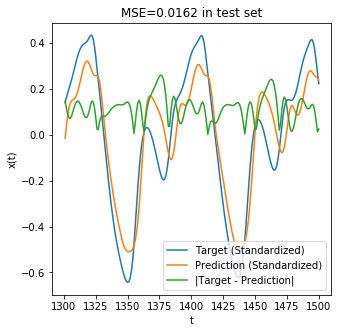

In [60]:
evaluate_generalization(t[n_val:n_test], patterns_test, targets_test, model_final)

### 4.3.2. Three-layer perceptron for noisy time series prediction - generalisation

#### Part 1. Examine how the validation prediction performance (estimated on a hold out set) depends on the number of nodes in the second hidden layer for different amount of noise.

Define the fucntion to evaluate different noise and hidden nodes of 2nd layer.

In [61]:
def evaluate_noise_nodes(patterns_train,
                         patterns_val,
                         targets_train,
                         targets_val,
                         hidden_nodes=DEFAULT_HIDDEN_NODES,
                         hidden_nodes_2_list=DEFAULT_HIDDEN_NODES_2,
                         learning_rate=DEFAULT_LEARNING_RATE,
                         learning_momentum=DEFAULT_LEARNING_MOMENTUM,
                         regularization=DEFAULT_REGULARIZATION,
                         stop_early=DEFAULT_STOP_EARLY,
                         stop_iterations=DEFAULT_STOP_ITERATIONS,
                         epochs=DEFAULT_EPOCHS,
                         training_noise_list=DEFAULT_TRAINING_NOISE
                        ):
    
    plt.figure(figsize=(5,5))
    for training_noise in training_noise_list:
        errors = []
        for hidden_nodes_2 in hidden_nodes_2_list:
            model = TimeSeriesPredictor(inputs=5,
                                        outputs=1,
                                        hidden_nodes=hidden_nodes,
                                        hidden_nodes_2=hidden_nodes_2,
                                        learning_rate=learning_rate,
                                        learning_momentum=learning_momentum,
                                        regularization=regularization,
                                        stop_early=stop_early,
                                        stop_iterations=stop_iterations
                                       )          
            model.train(patterns_train, targets_train, patterns_val, targets_val, epochs=epochs, 
                        noise=training_noise)
            predictions_val = model.predict(patterns_val).T
            mse = np.mean((predictions_val-targets_val)**2)
            errors.append(mse)
        plt.plot(hidden_nodes_2_list, errors, marker='x', label="noise="+str(training_noise))
    plt.xlabel("Hidden Nodes 2nd Layer")
    plt.ylabel("MSE in validation")
    plt.legend()
    plt.grid()

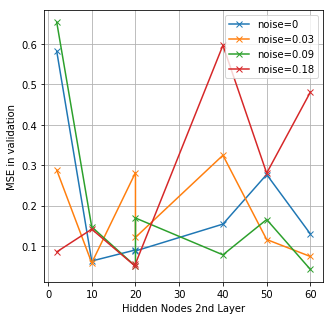

In [62]:
evaluate_noise_nodes(patterns_train,
                     patterns_val,
                     targets_train,
                     targets_val,
                     hidden_nodes=30,
                     regularization=0.001,
                     training_noise_list=[0,0.03,0.09,0.18],
                     hidden_nodes_2_list=[2,10,20,20,40,50,60]
                    )

#### Part 6. What is the effect of regularisation? How does the regularisation parameter interact with the amount of noise

Define the fucntion to evaluate different regularizations and noises.

In [63]:
def evaluate_reg_noise(patterns_train,
                       patterns_val,
                       targets_train,
                       targets_val,
                       hidden_nodes=DEFAULT_HIDDEN_NODES,
                       hidden_nodes_2=DEFAULT_HIDDEN_NODES_2,
                       learning_rate=DEFAULT_LEARNING_RATE,
                       learning_momentum=DEFAULT_LEARNING_MOMENTUM,
                       regularization_list=DEFAULT_REGULARIZATION,
                       stop_early=DEFAULT_STOP_EARLY,
                       stop_iterations=DEFAULT_STOP_ITERATIONS,
                       epochs=DEFAULT_EPOCHS,
                       training_noise_list=DEFAULT_TRAINING_NOISE
                      ):
    
    plt.figure(figsize=(5,5))
    for reg in regularization_list:
        errors = []
        for training_noise in training_noise_list:
            model = TimeSeriesPredictor(inputs=5,
                                        outputs=1,
                                        hidden_nodes=hidden_nodes,
                                        hidden_nodes_2=hidden_nodes_2,
                                        learning_rate=learning_rate,
                                        learning_momentum=learning_momentum,
                                        regularization=reg,
                                        stop_early=stop_early,
                                        stop_iterations=stop_iterations
                                       )                
            model.train(patterns_train, targets_train, patterns_val, targets_val, epochs=epochs, 
                        noise=training_noise)
            predictions_val = model.predict(patterns_val).T
            mse = np.mean((predictions_val-targets_val)**2)
            errors.append(mse)
        plt.plot(training_noise_list, errors, marker='x', label="reg="+str(reg))
    plt.xlabel("Training noise")
    plt.ylabel("MSE in validation")
    plt.legend()
    plt.grid()

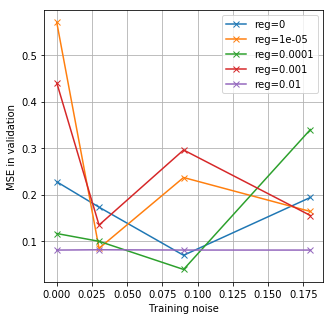

In [64]:
evaluate_reg_noise(patterns_train,
                   patterns_val,
                   targets_train,
                   targets_val,
                   hidden_nodes=30,
                   hidden_nodes_2=10,
                   training_noise_list=[0,0.03,0.09,0.18],
                   regularization_list=[0,1e-5,1e-4,1e-3,1e-2]
                  )

#### Part 7. Compare Generalization Performance with Previous best Network. 
For intermediate level of noise (sigma = 0.09) choose the best three-layer model (explain and motivate which data subset you use for this purpose). Then compare the selected model with the two-layer network model you picked in the beginning of this task.

Define the fucntion to evaluate different regularizations and hidden nodes.

In [65]:
def evaluate_reg_nodes(patterns_train,
                       patterns_val,
                       targets_train,
                       targets_val,
                       hidden_nodes=DEFAULT_HIDDEN_NODES,
                       hidden_nodes_2_list=DEFAULT_HIDDEN_NODES_2,
                       learning_rate=DEFAULT_LEARNING_RATE,
                       learning_momentum=DEFAULT_LEARNING_MOMENTUM,
                       regularization_list=DEFAULT_REGULARIZATION,
                       stop_early=DEFAULT_STOP_EARLY,
                       stop_iterations=DEFAULT_STOP_ITERATIONS,
                       epochs=DEFAULT_EPOCHS,
                       training_noise=DEFAULT_TRAINING_NOISE
                      ):
    
    plt.figure(figsize=(5,5))
    for reg in regularization_list:
        errors = []
        for hidden_nodes_2 in hidden_nodes_2_list:
            model = TimeSeriesPredictor(inputs=5,
                                        outputs=1,
                                        hidden_nodes=hidden_nodes,
                                        hidden_nodes_2=hidden_nodes_2,
                                        learning_rate=learning_rate,
                                        learning_momentum=learning_momentum,
                                        regularization=reg,
                                        stop_early=stop_early,
                                        stop_iterations=stop_iterations
                                       )            
            model.train(patterns_train, targets_train, patterns_val, targets_val, epochs=epochs,
                        noise=training_noise)
            predictions_val = model.predict(patterns_val).T
            mse = np.mean((predictions_val-targets_val)**2)
            errors.append(mse)
        plt.plot(hidden_nodes_2_list, errors, marker='x', label="reg="+str(reg))
    plt.xlabel("Hidden Nodes")
    plt.ylabel("MSE in validation")
    plt.legend()
    plt.grid()

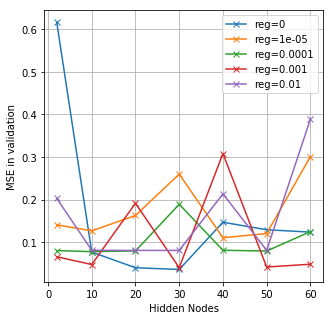

In [66]:
evaluate_reg_nodes(patterns_train,
                   patterns_val,
                   targets_train,
                   targets_val,
                   hidden_nodes=30,
                   training_noise=0.09,
                   regularization_list=[0,1e-5,1e-4,1e-3,1e-2],
                   hidden_nodes_2_list=[2,10,20,30,40,50,60]
                  )

Compare with the optimal 2 layer network.

For optimal 1 hidden layer:


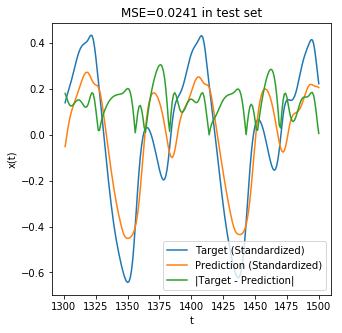

In [67]:
model_final_2layer = TimeSeriesPredictor(inputs=5, outputs=1, hidden_nodes=30, regularization=0.001)
model_final_2layer.train(patterns_train=patterns_train,
                         targets_train= targets_train, 
                         patterns_val=patterns_val,
                         targets_val=targets_val,
                         noise=0.09,
                         epochs=10000)
print("For optimal 1 hidden layer:")
evaluate_generalization(t[n_val:n_test], patterns_test, targets_test, model_final_2layer)

For optimal 2 hidden layer:


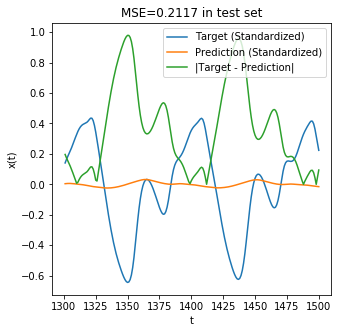

In [68]:
model_final_3layer = TimeSeriesPredictor(inputs=5, outputs=1, hidden_nodes=30, hidden_nodes_2=30, 
                                         regularization=0.0001)
model_final_3layer.train(patterns_train=patterns_train,
                         targets_train= targets_train, 
                         patterns_val=patterns_val,
                         targets_val=targets_val,
                         noise=0.09,
                         epochs=10000)
print("For optimal 2 hidden layer:")
evaluate_generalization(t[n_val:n_test], patterns_test, targets_test, model_final_3layer)

#### Part 8. What is the computation cost (time) of backprop learning involved in scaling the network size.

Define the fucntion to evaluate different training times for hidden nodes.

In [69]:
def evaluate_training_time(patterns_train,
                           patterns_val,
                           targets_train,
                           targets_val,
                           hidden_nodes_2_list=DEFAULT_HIDDEN_NODES_2,
                           runs=10
                          ):
    
    plt.figure(figsize=(5,5))
    for hidden_nodes_2 in hidden_nodes_2_list:
        model = TimeSeriesPredictor(inputs=5, outputs=1, hidden_nodes_2=hidden_nodes_2)      
        times = []
        for run in range(runs):
            start = time.time()
            model.train(patterns_train, targets_train, patterns_val, targets_val)
            times.append(time.time()-start)
        plt.errorbar(hidden_nodes_2, np.mean(times), yerr=np.std(times), c="blue")
    plt.xlabel("Hidden nodes 2nd layer")
    plt.ylabel("Execution time (seconds)")

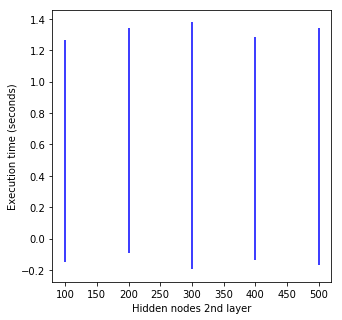

In [70]:
evaluate_training_time(patterns_train,
                       patterns_val,
                       targets_train,
                       targets_val,
                       hidden_nodes_2_list=[100,200,300,400,500]
                      )